In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use("seaborn-colorblind")
warnings.filterwarnings("ignore")

# Plotting results


In [7]:
def violin_plots(name, column, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    fig, ax = plt.subplots(figsize=(5, 3), dpi=300)

    for pos, (group, values) in enumerate(results.groupby("initialisation")):
        ax.boxplot(values[column], positions=[pos], sym=".")
        ax.violinplot(values[column], [pos], showextrema=False)

    separated_column = " ".join(column.split("_"))
    ax.set_xticks((0, 1, 2))
    ax.set_xticklabels(("Cao", "Huang", "Matching"))
    ax.set_xlabel("Initialisation method")
    ax.set_ylabel(separated_column.capitalize())
    ax.set_title(name)

    if destination is not None:
        plt.tight_layout()
        plt.savefig(destination + f"{name}_{column}_violinplot.pdf", transparent=True)


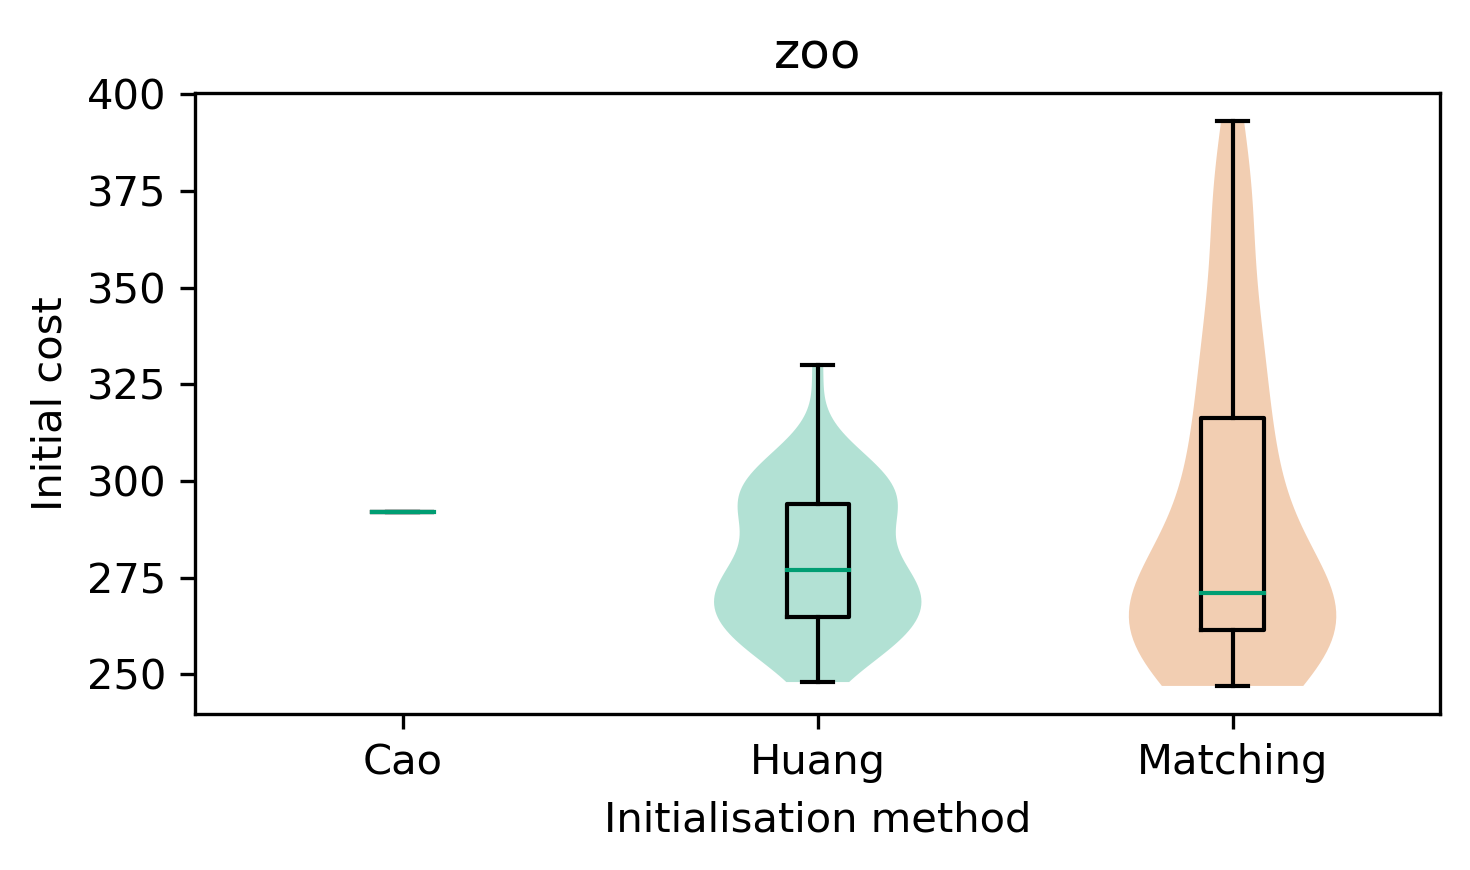

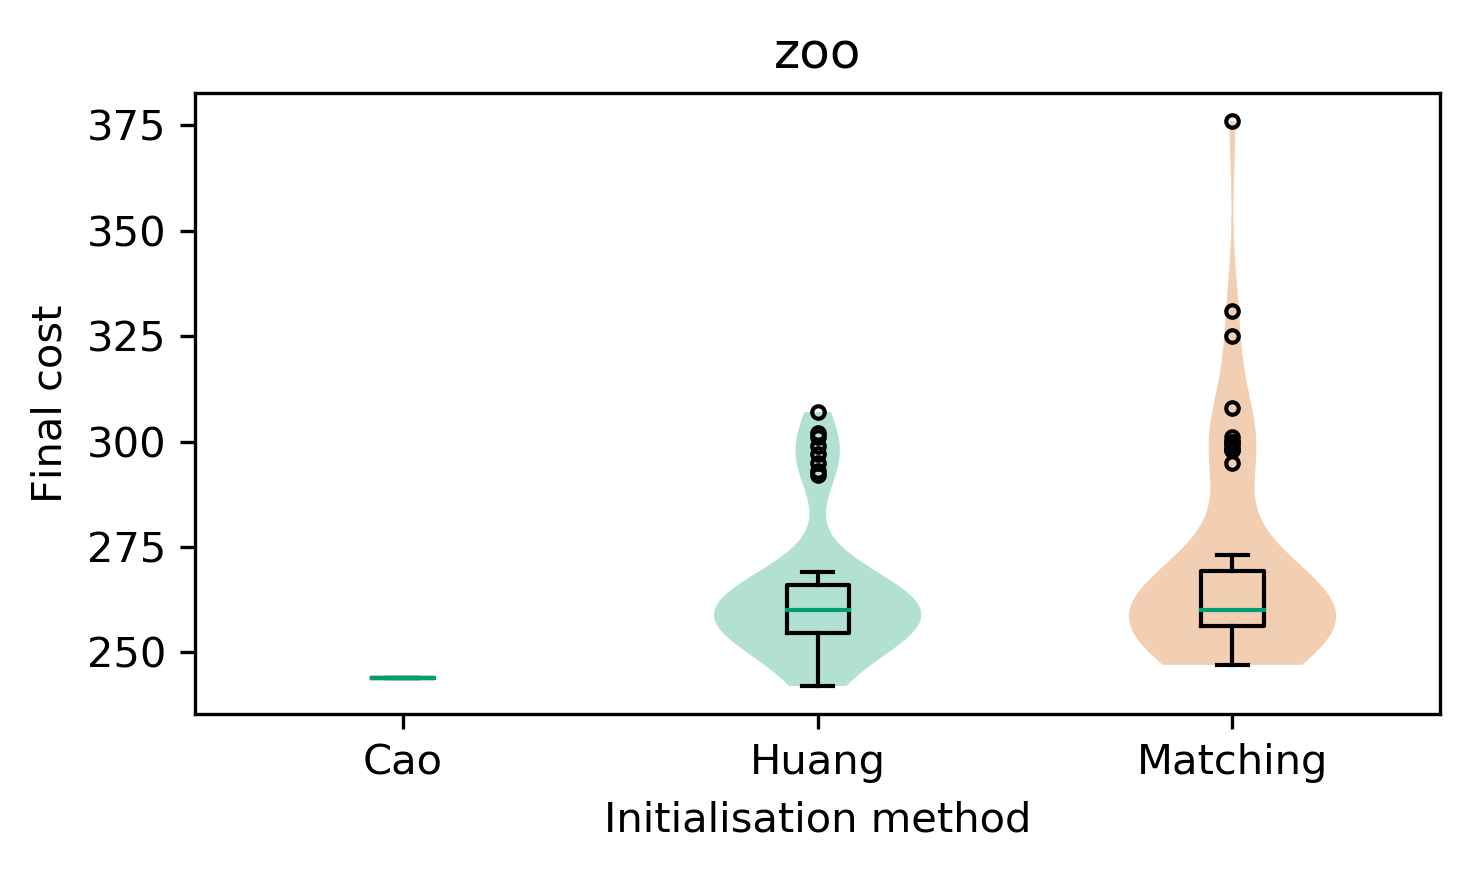

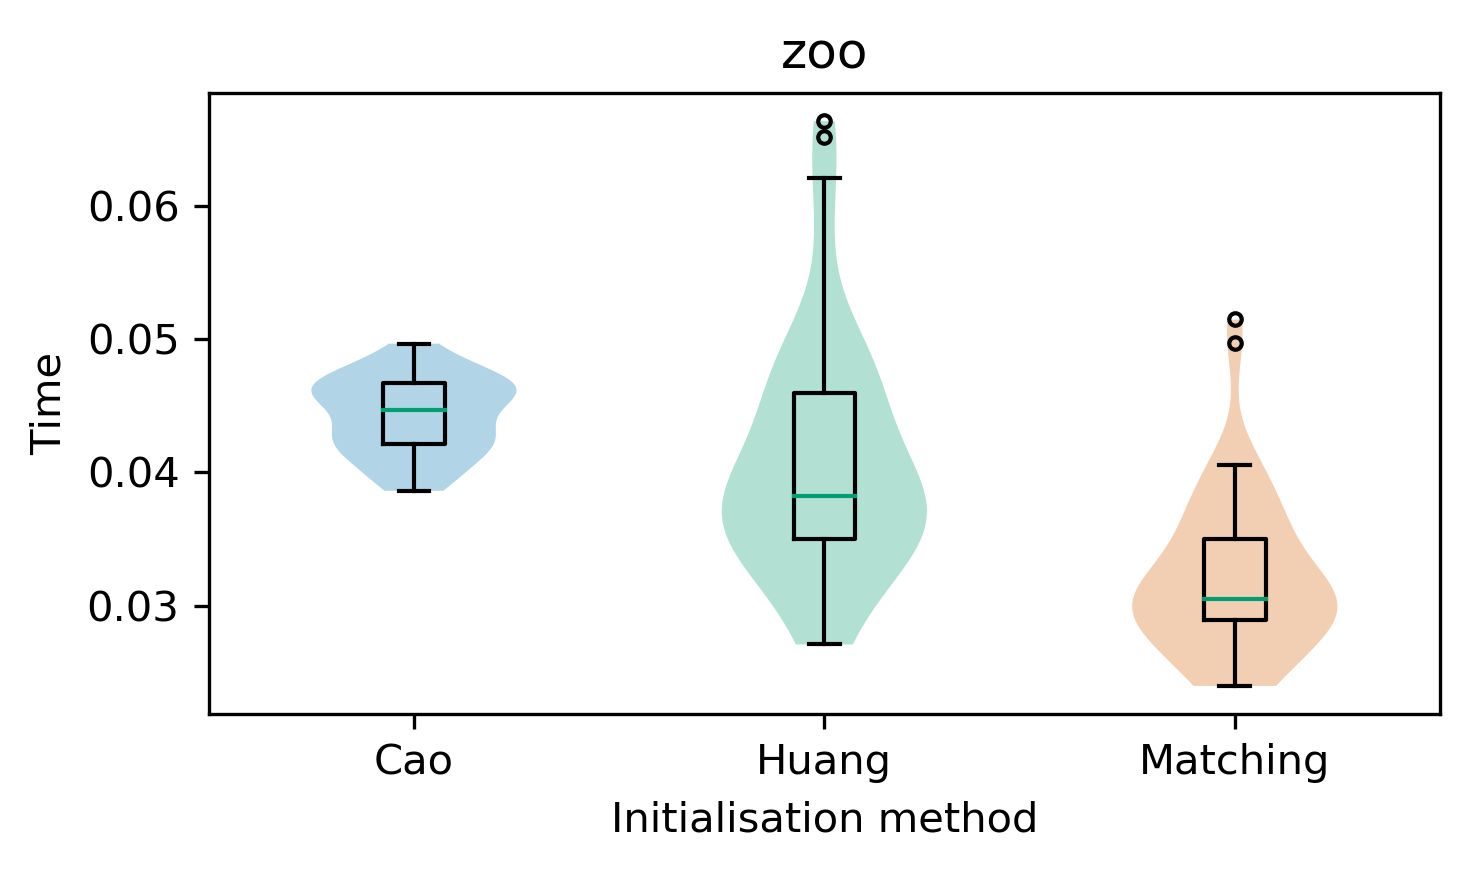

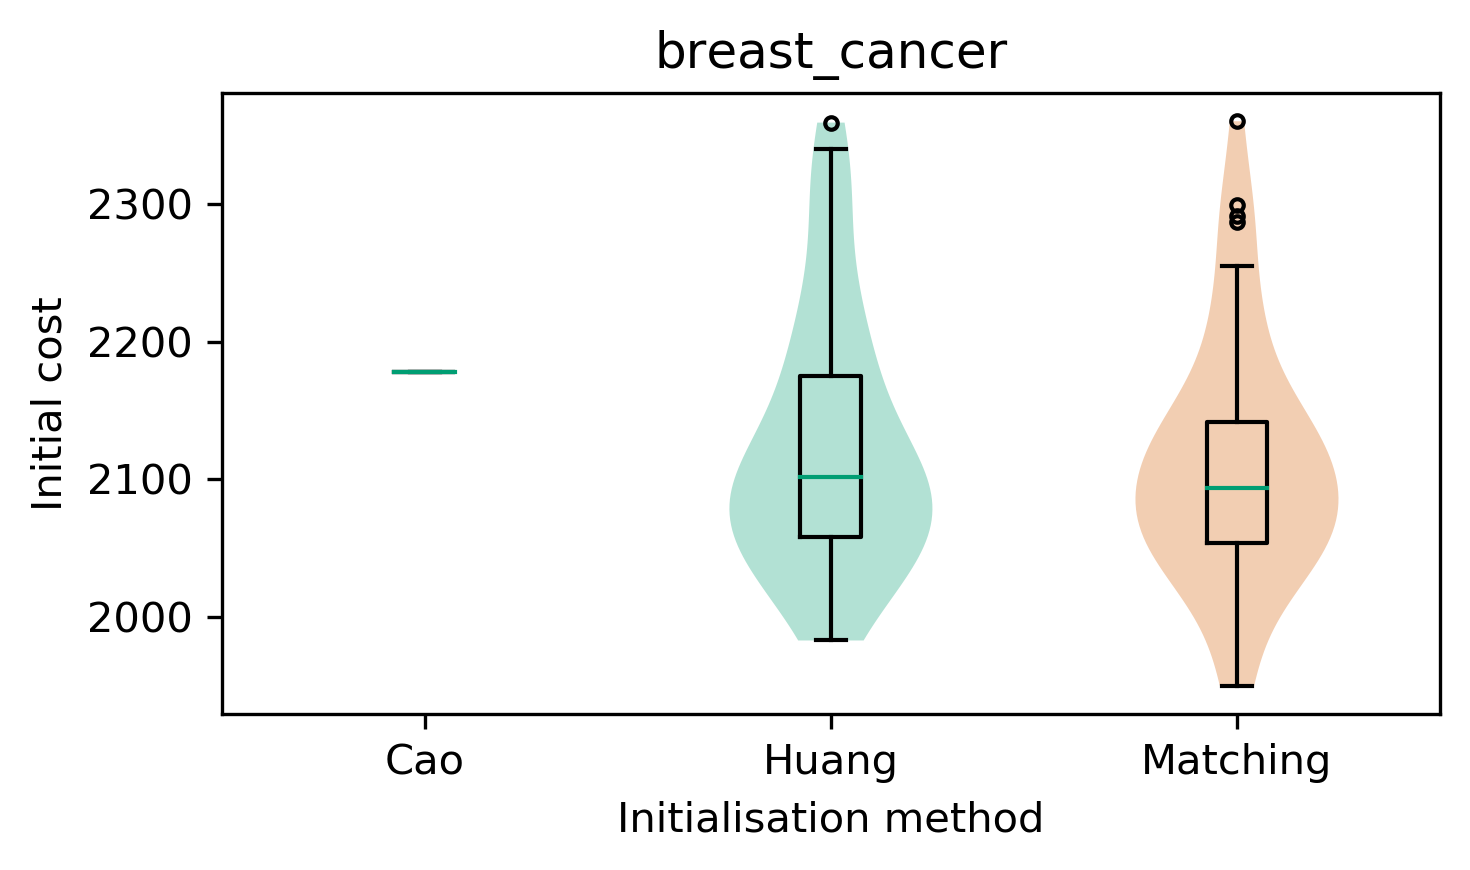

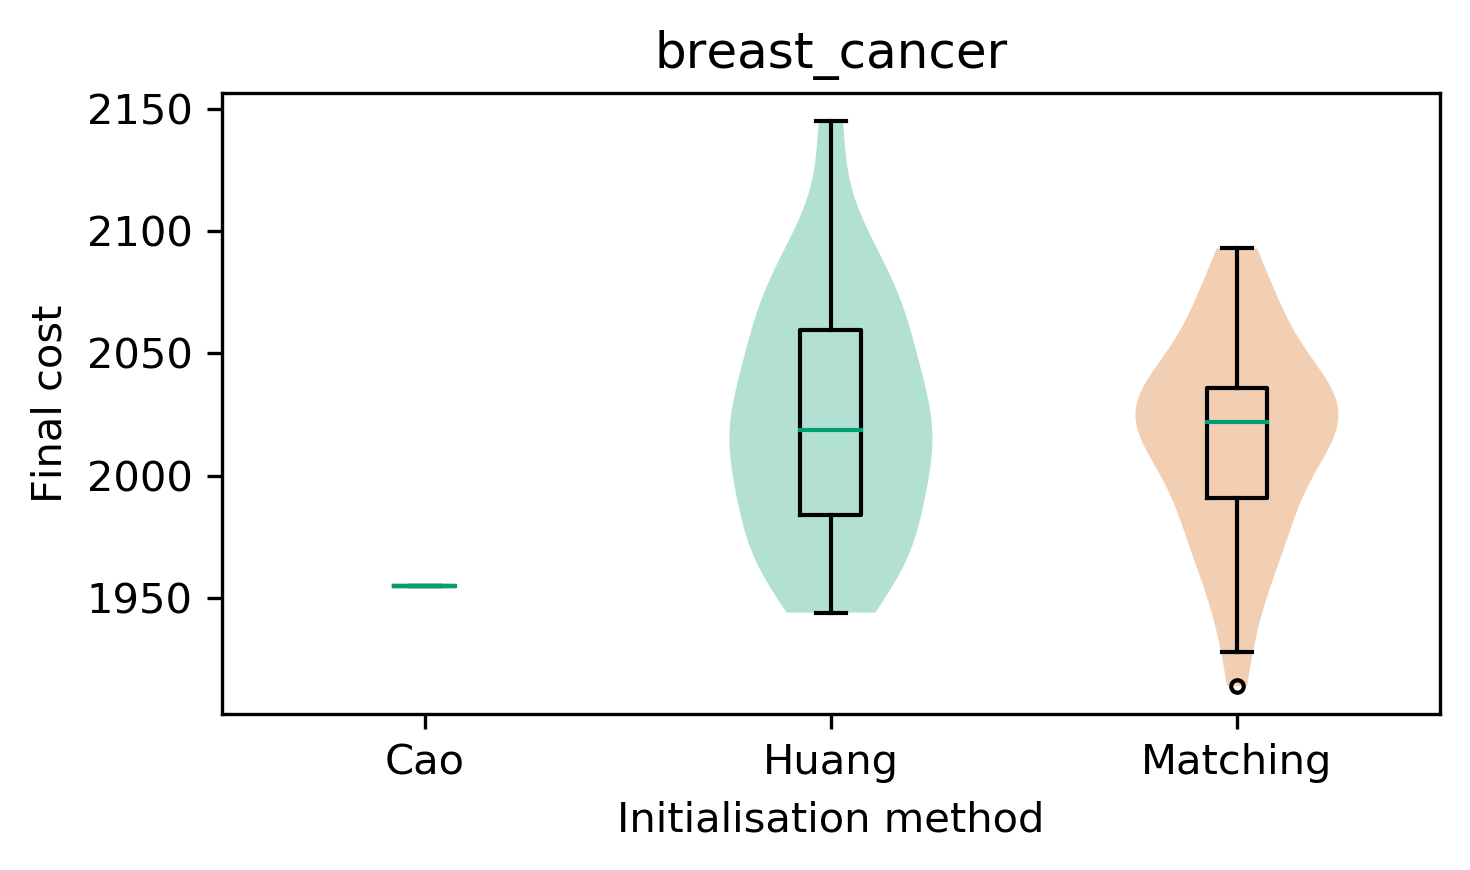

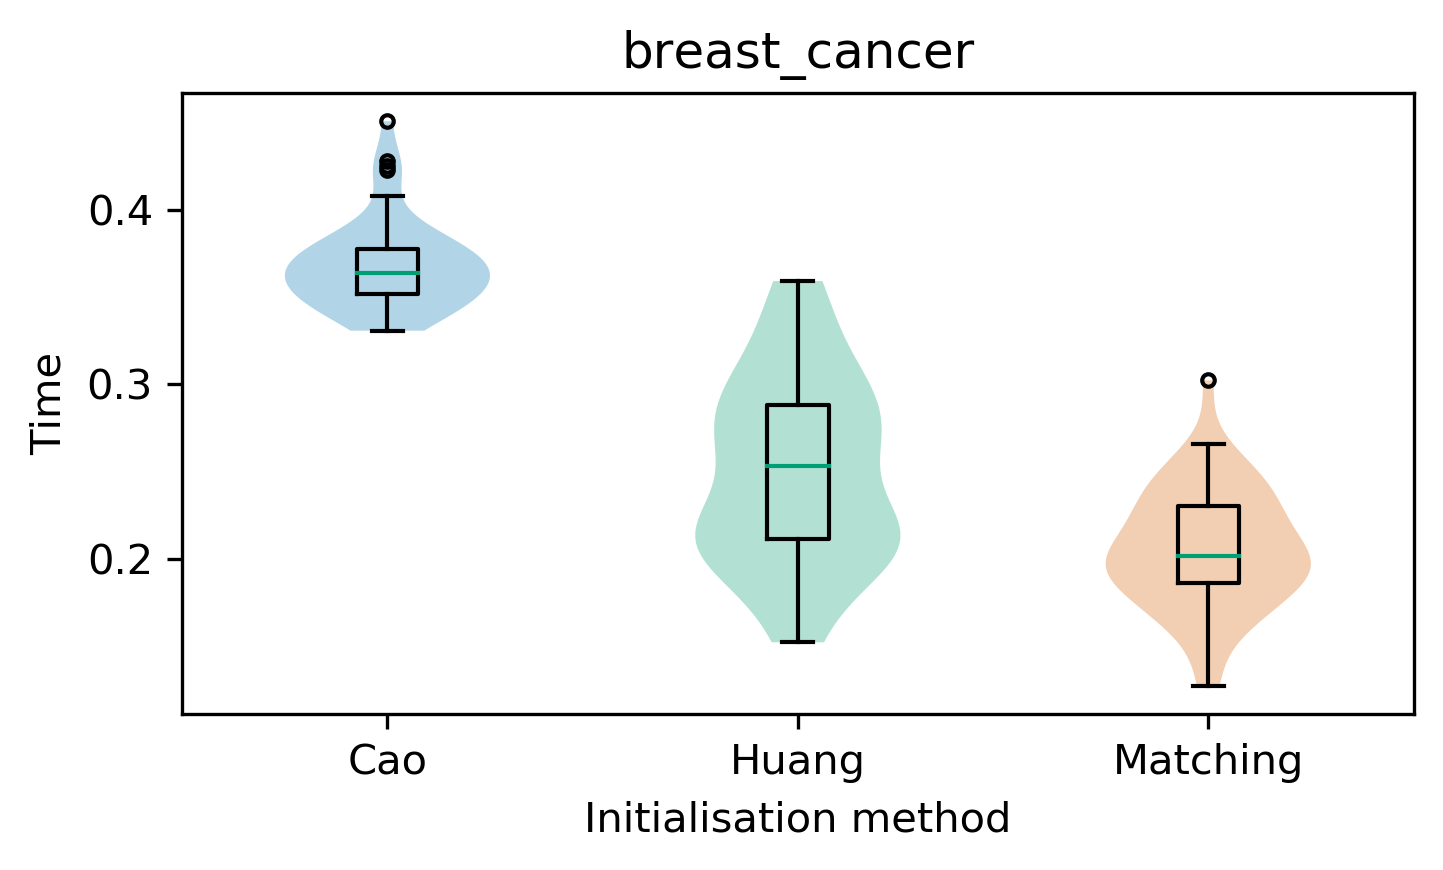

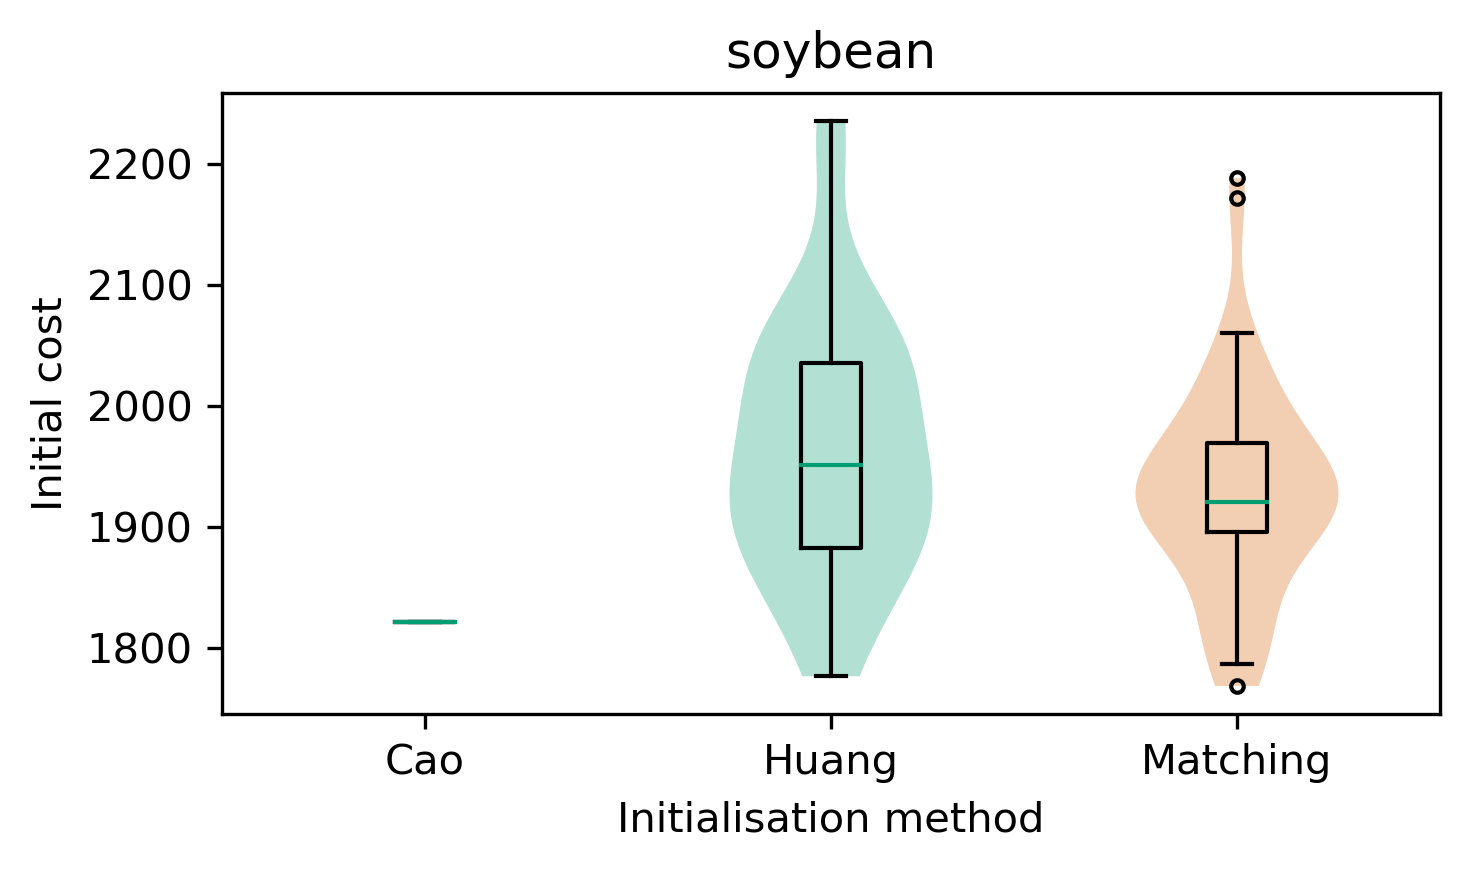

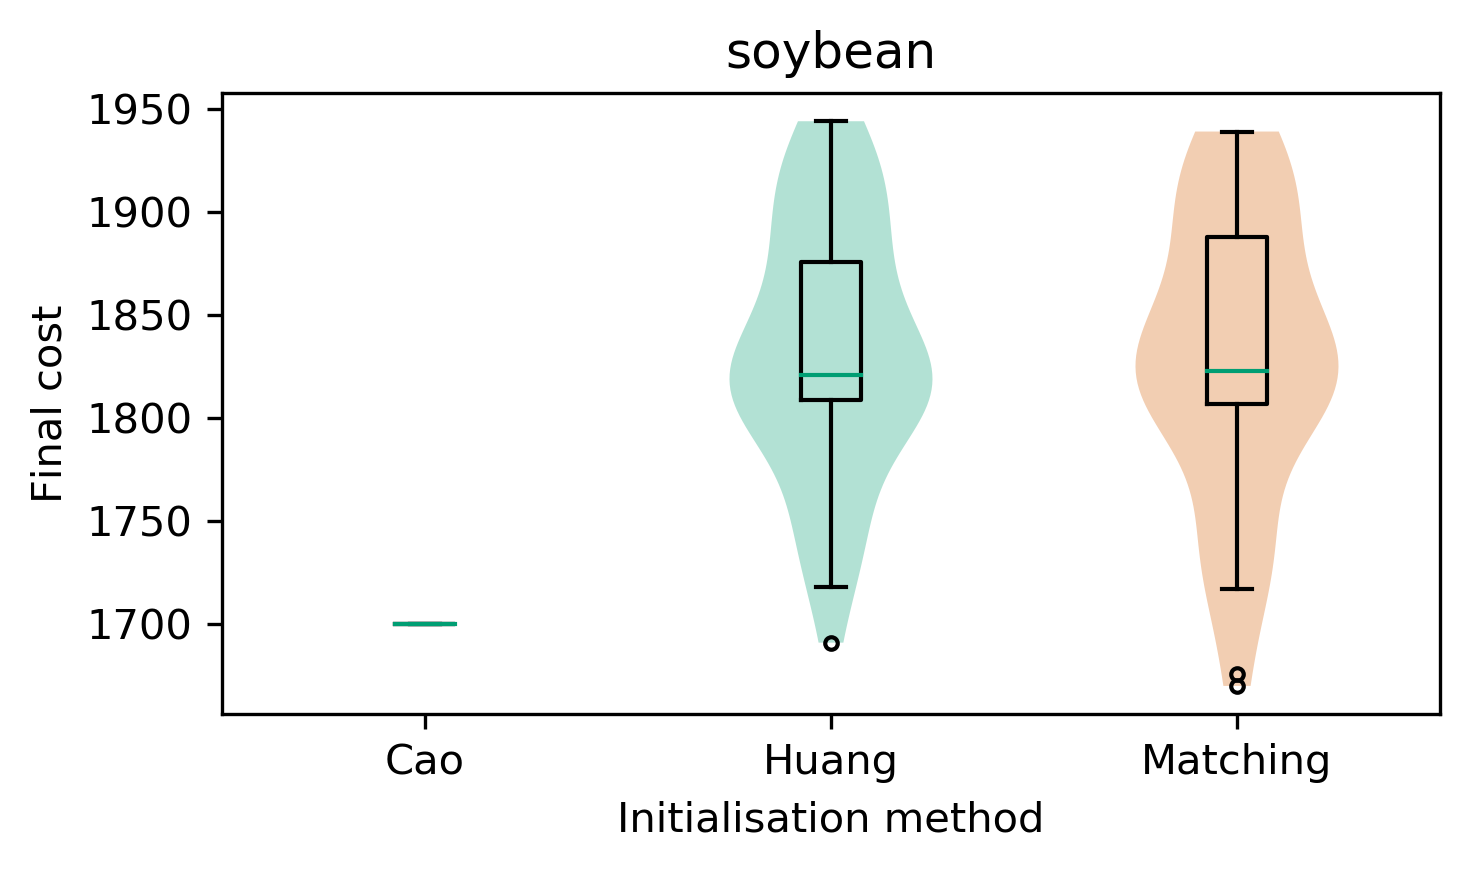

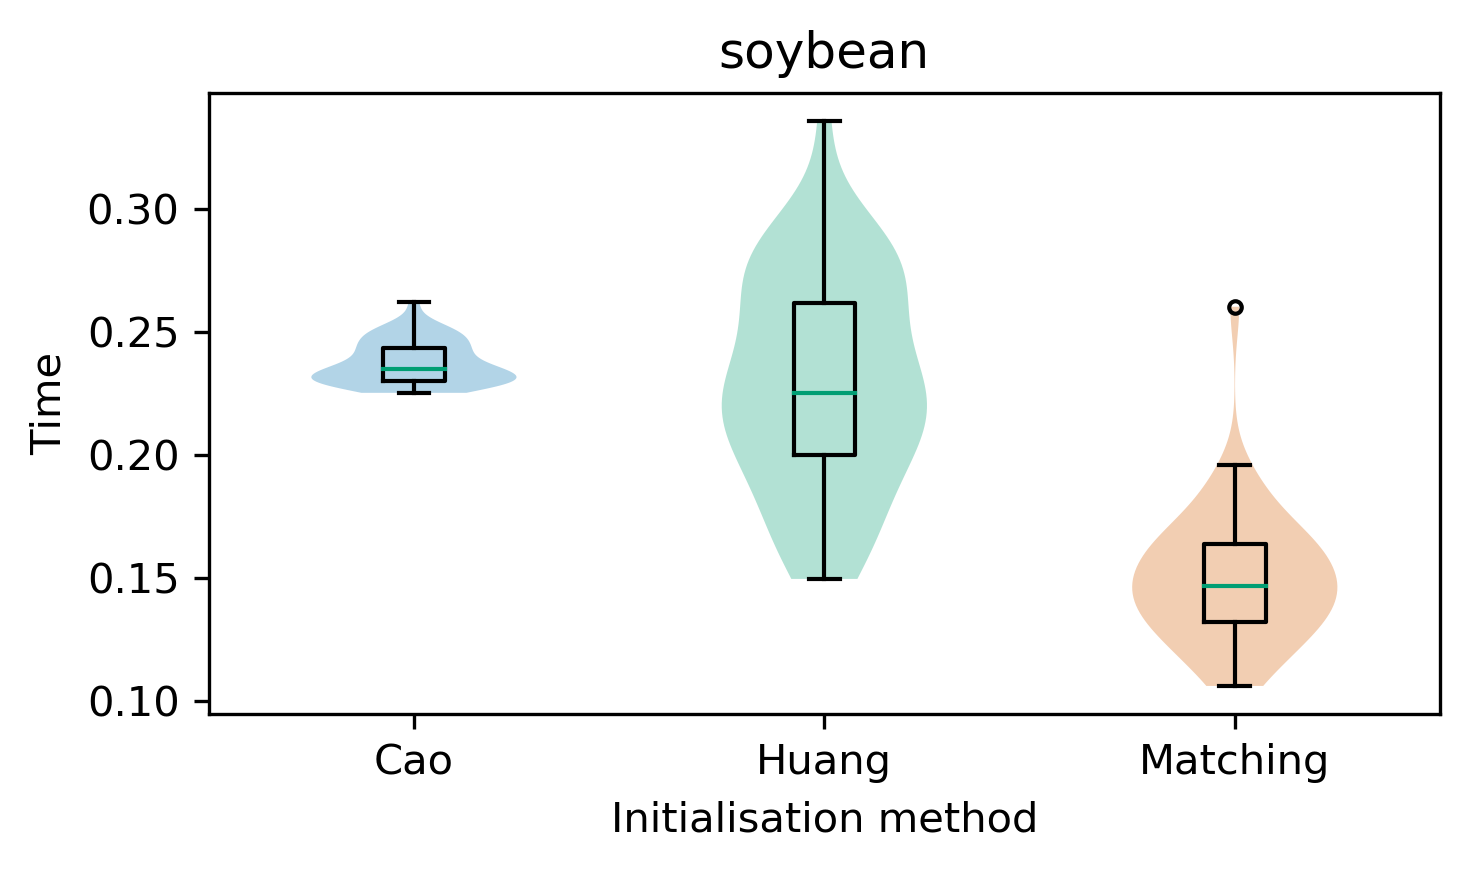

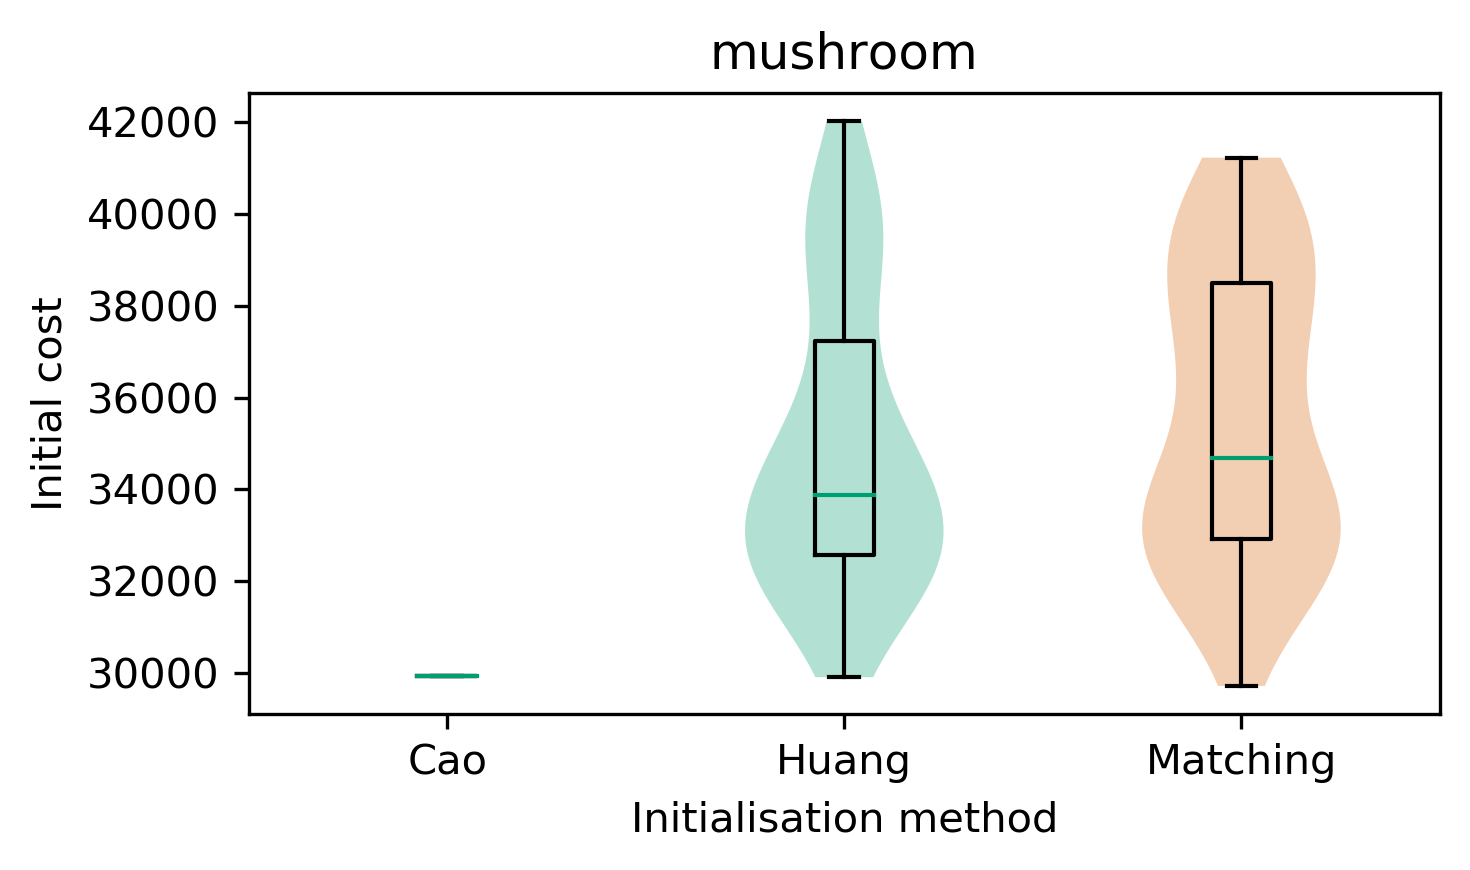

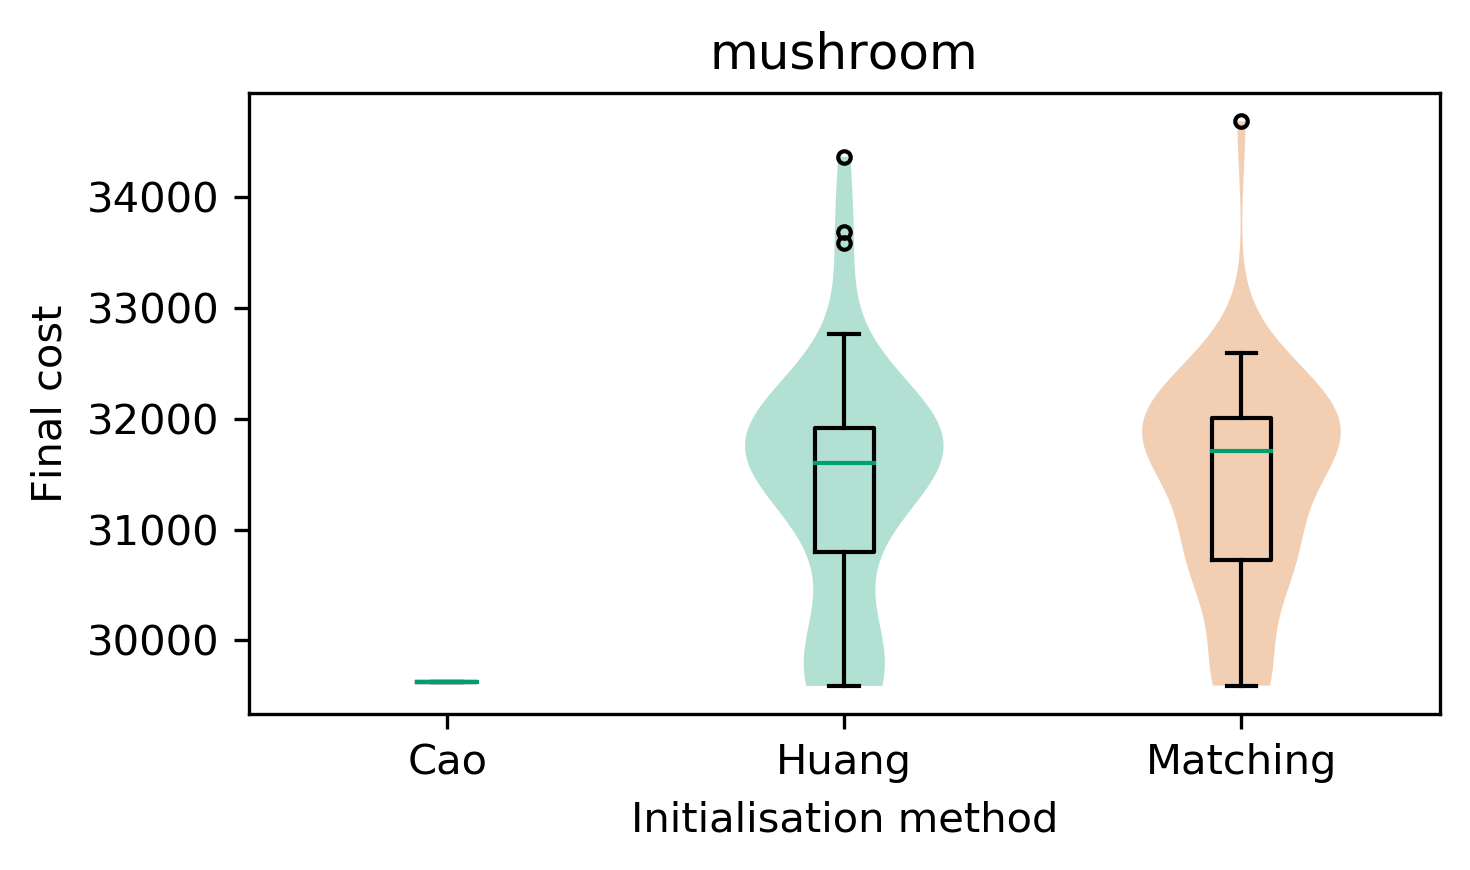

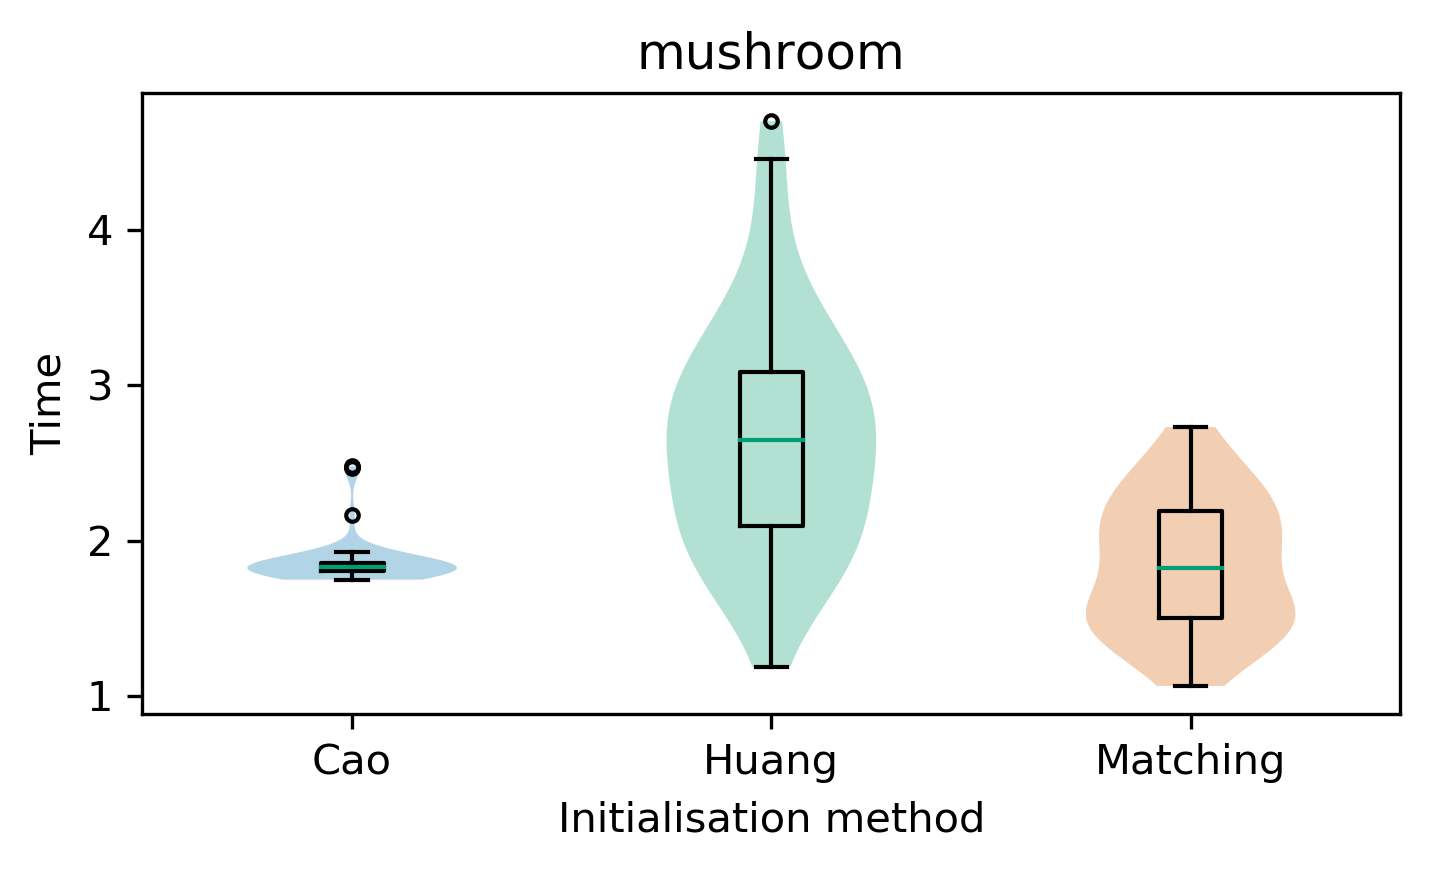

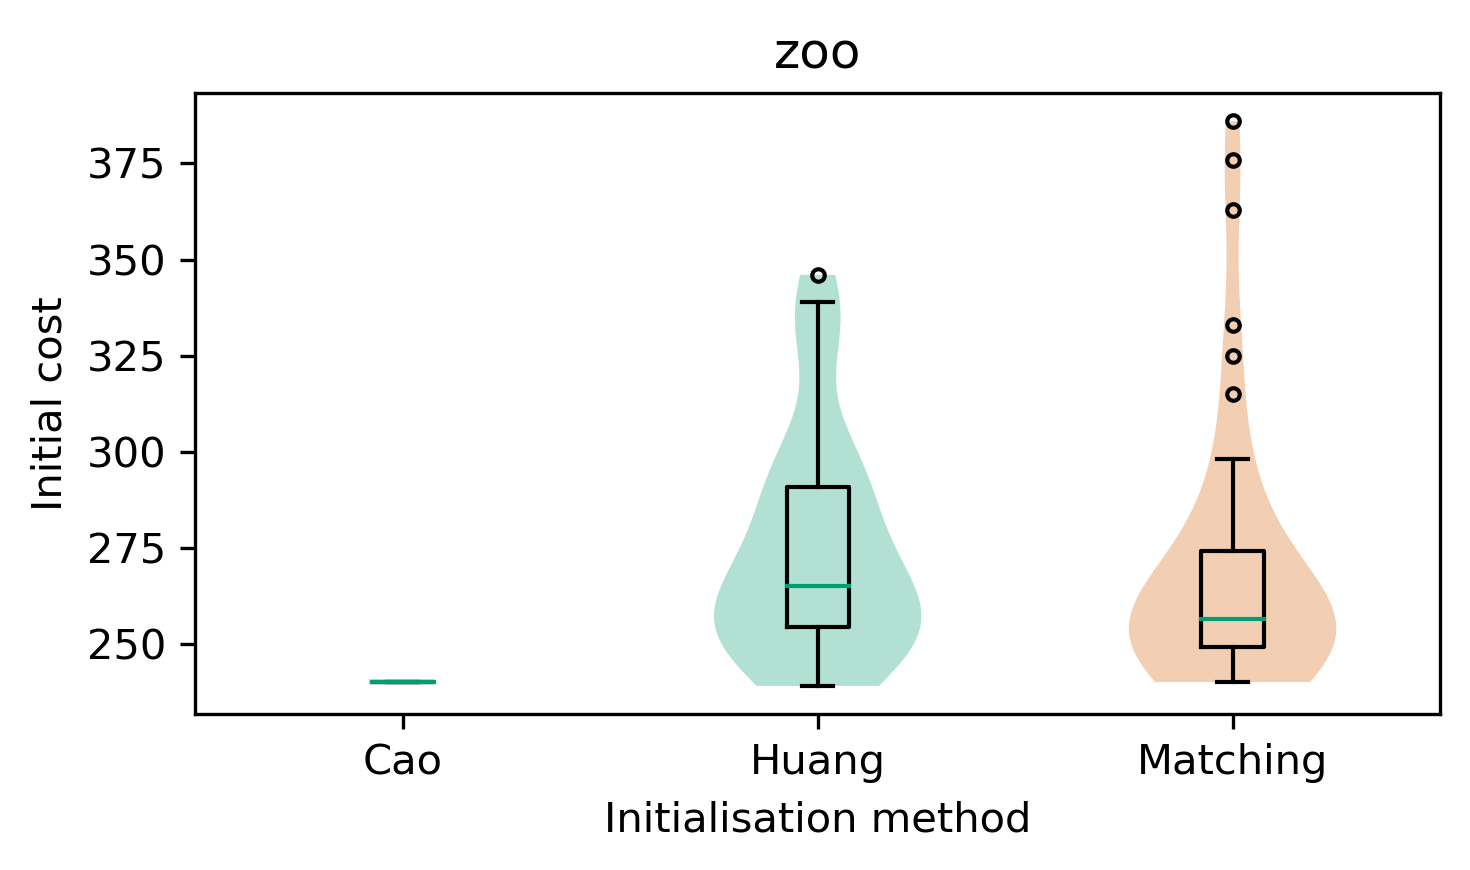

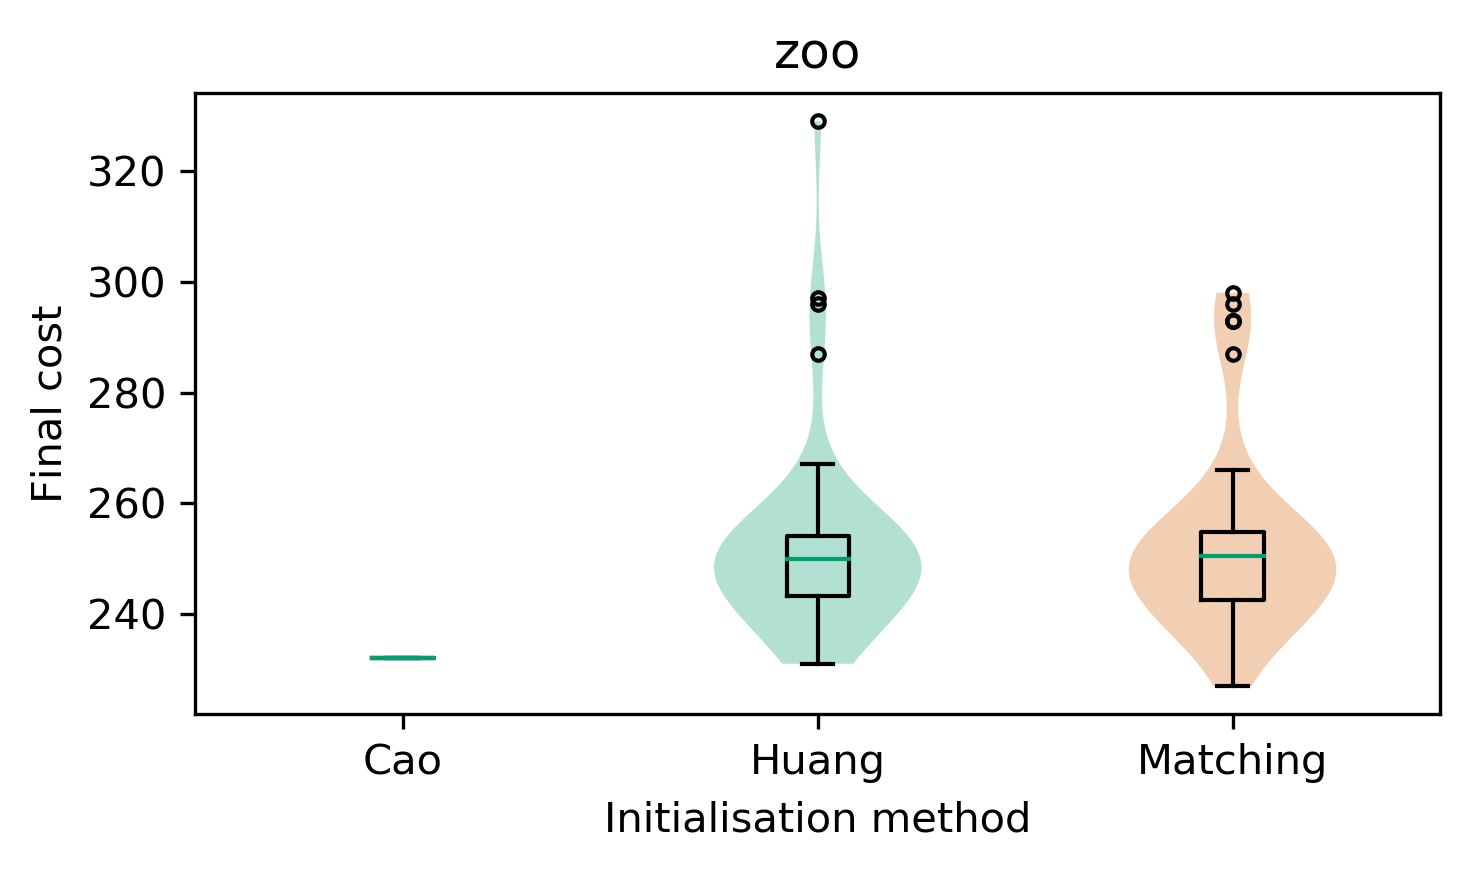

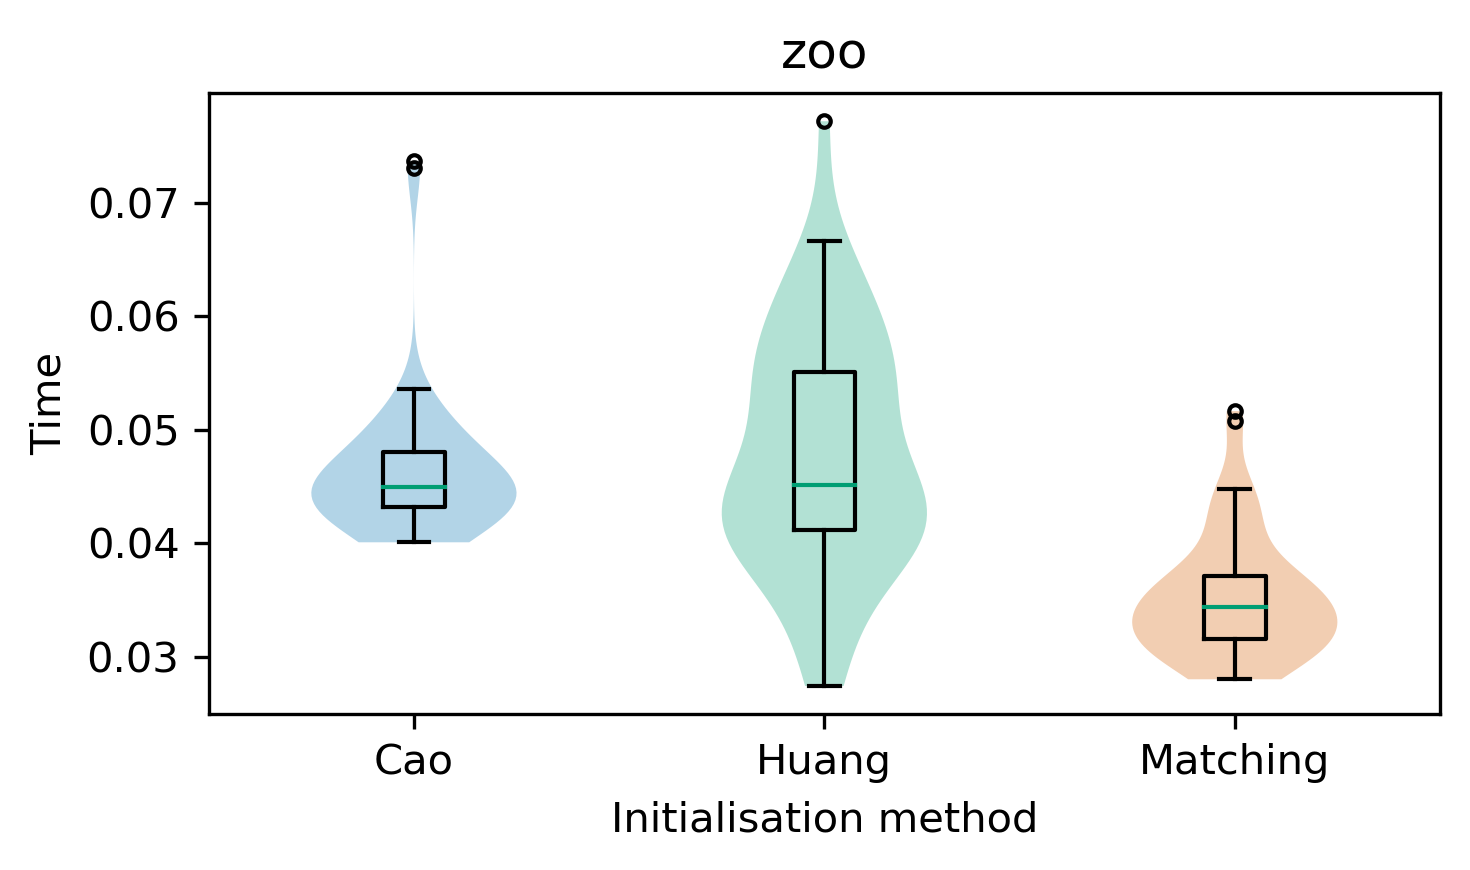

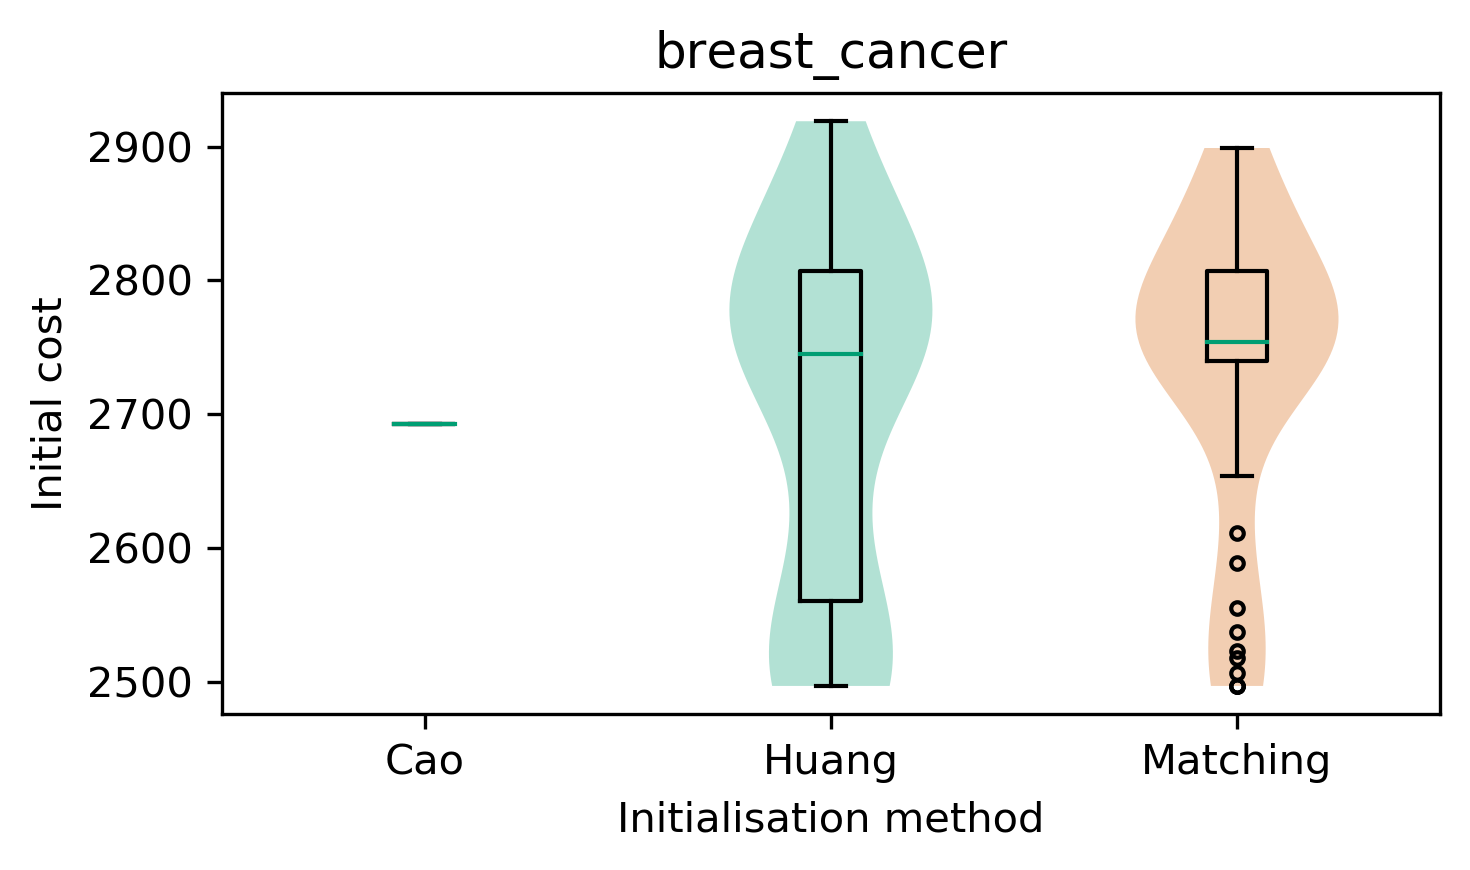

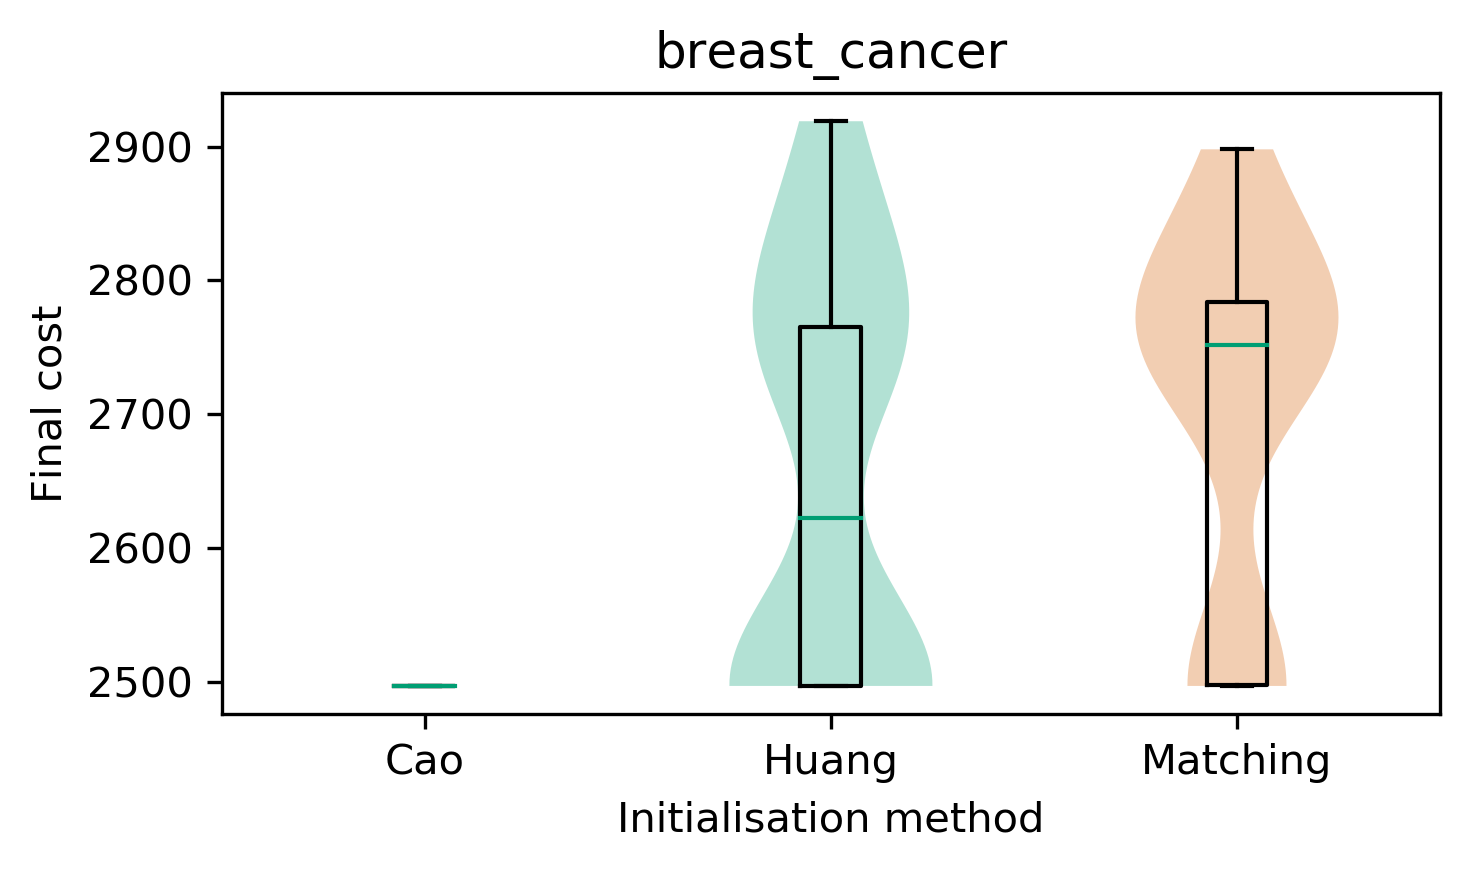

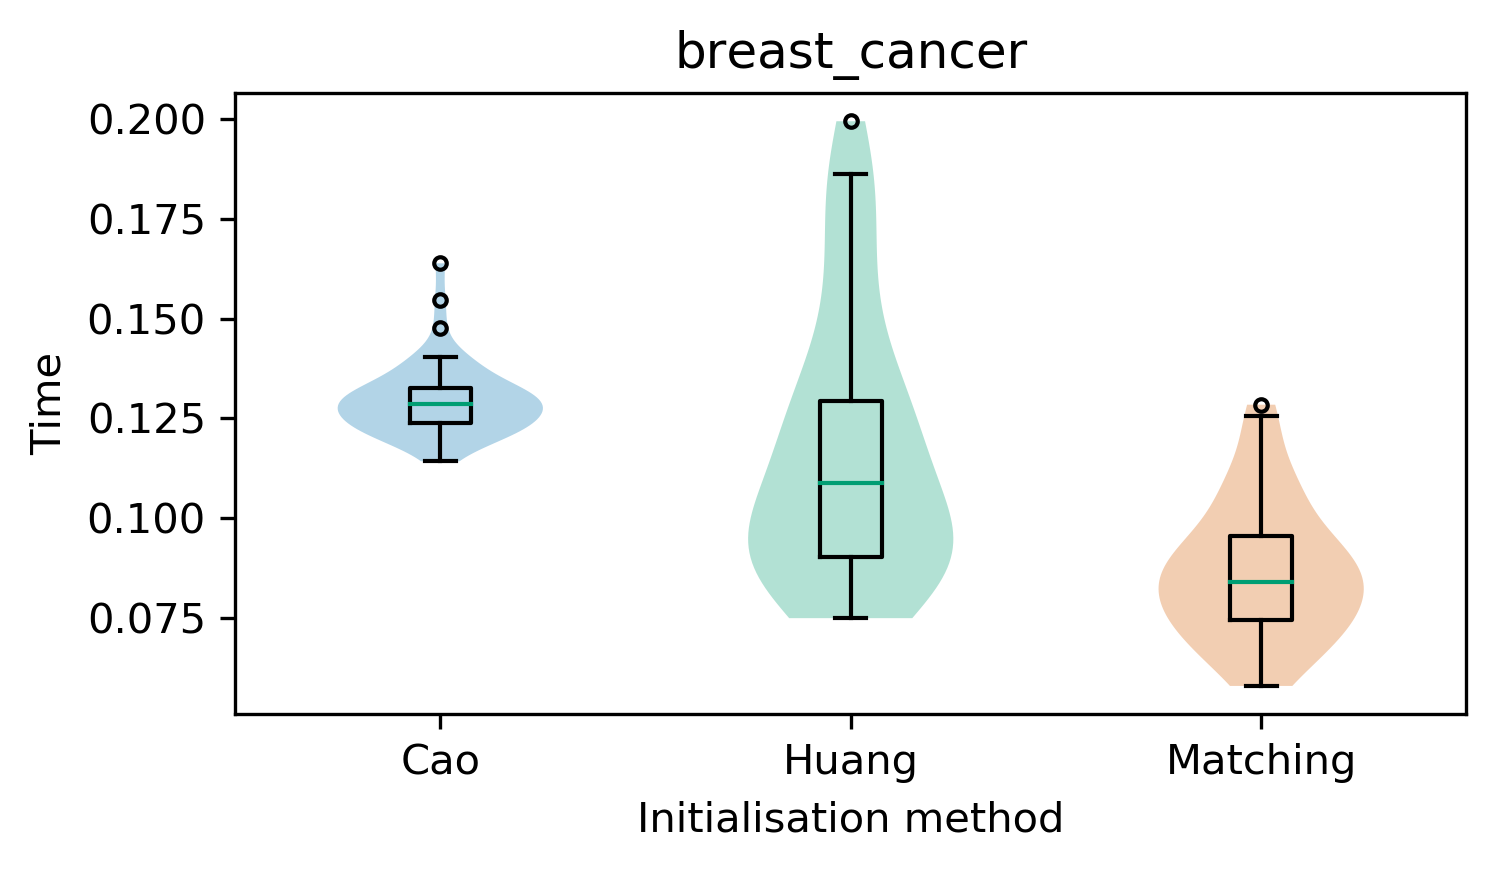

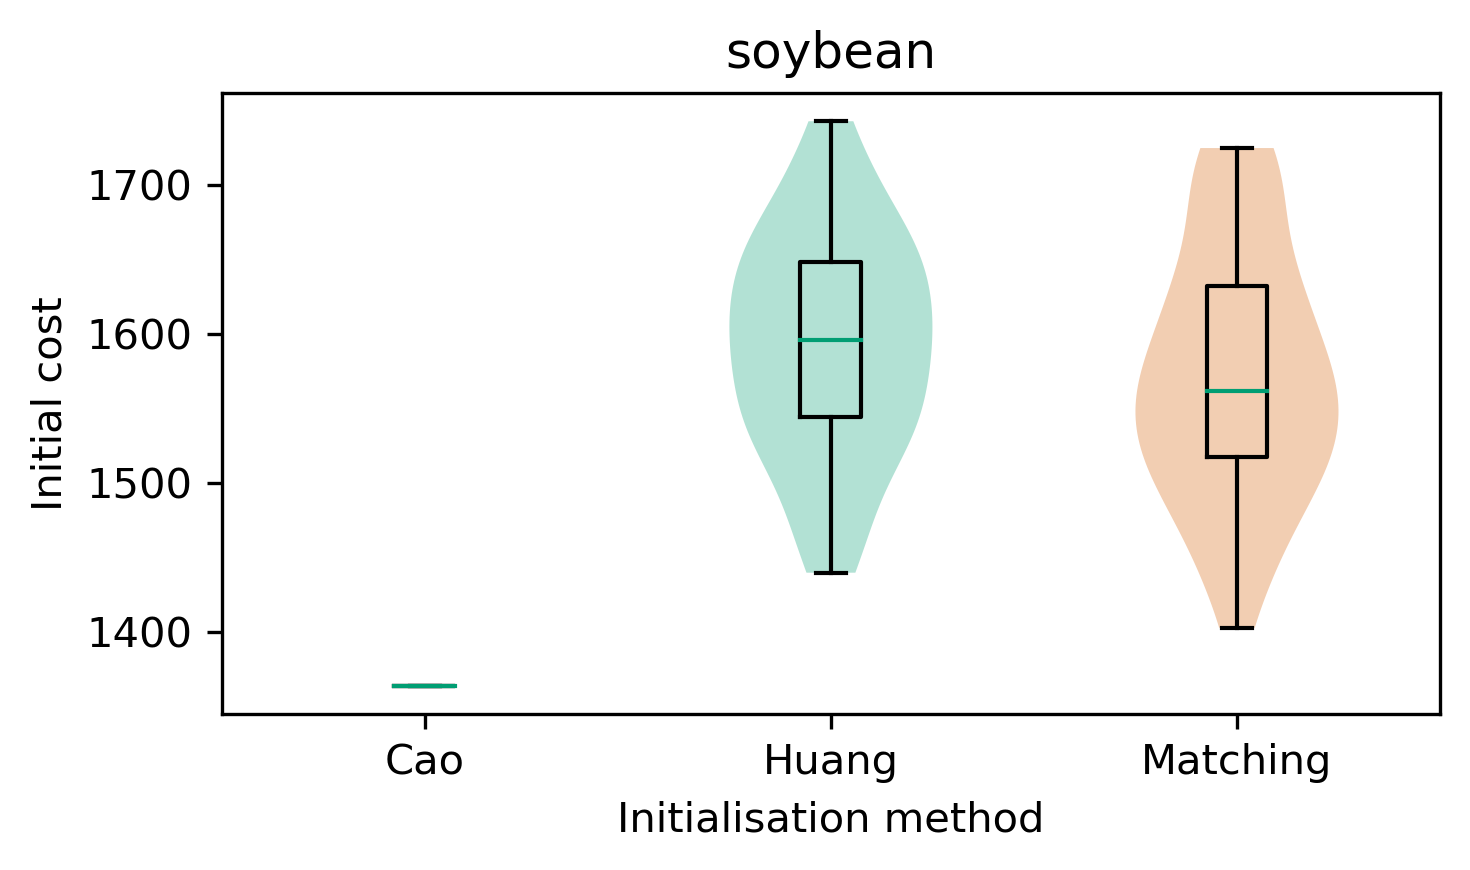

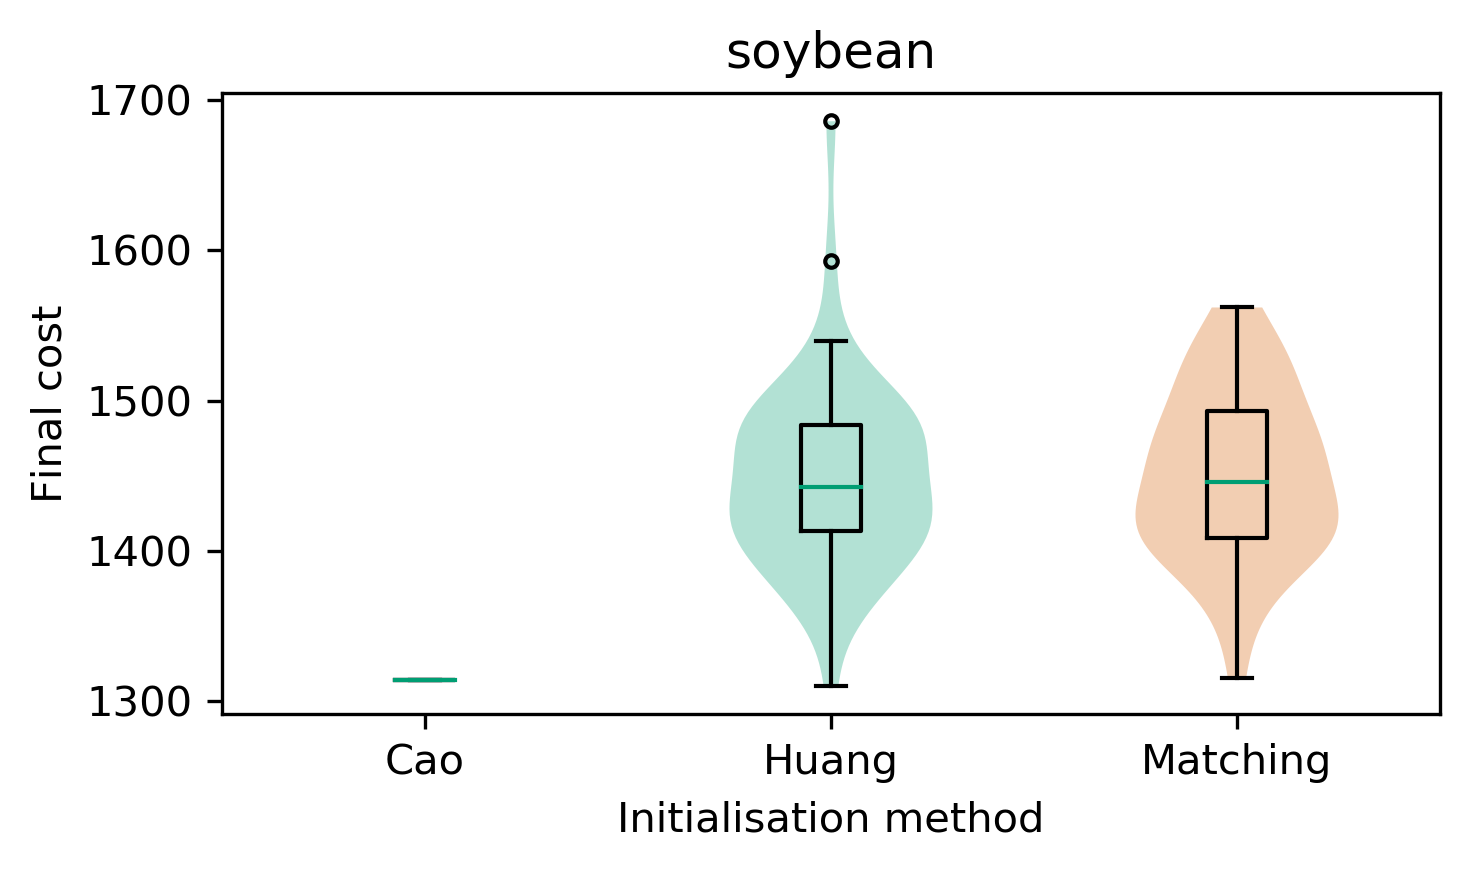

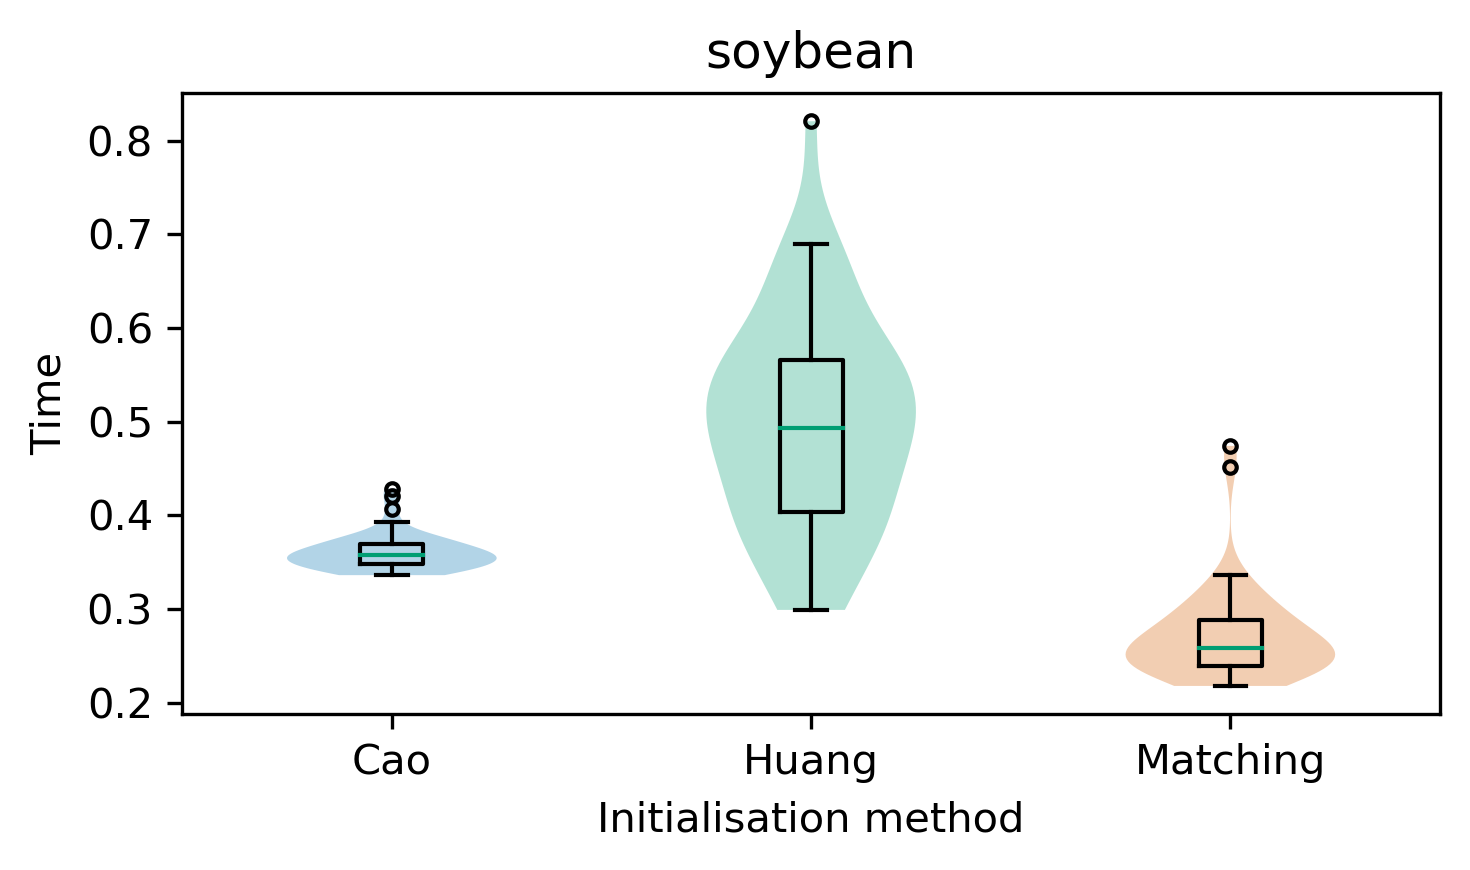

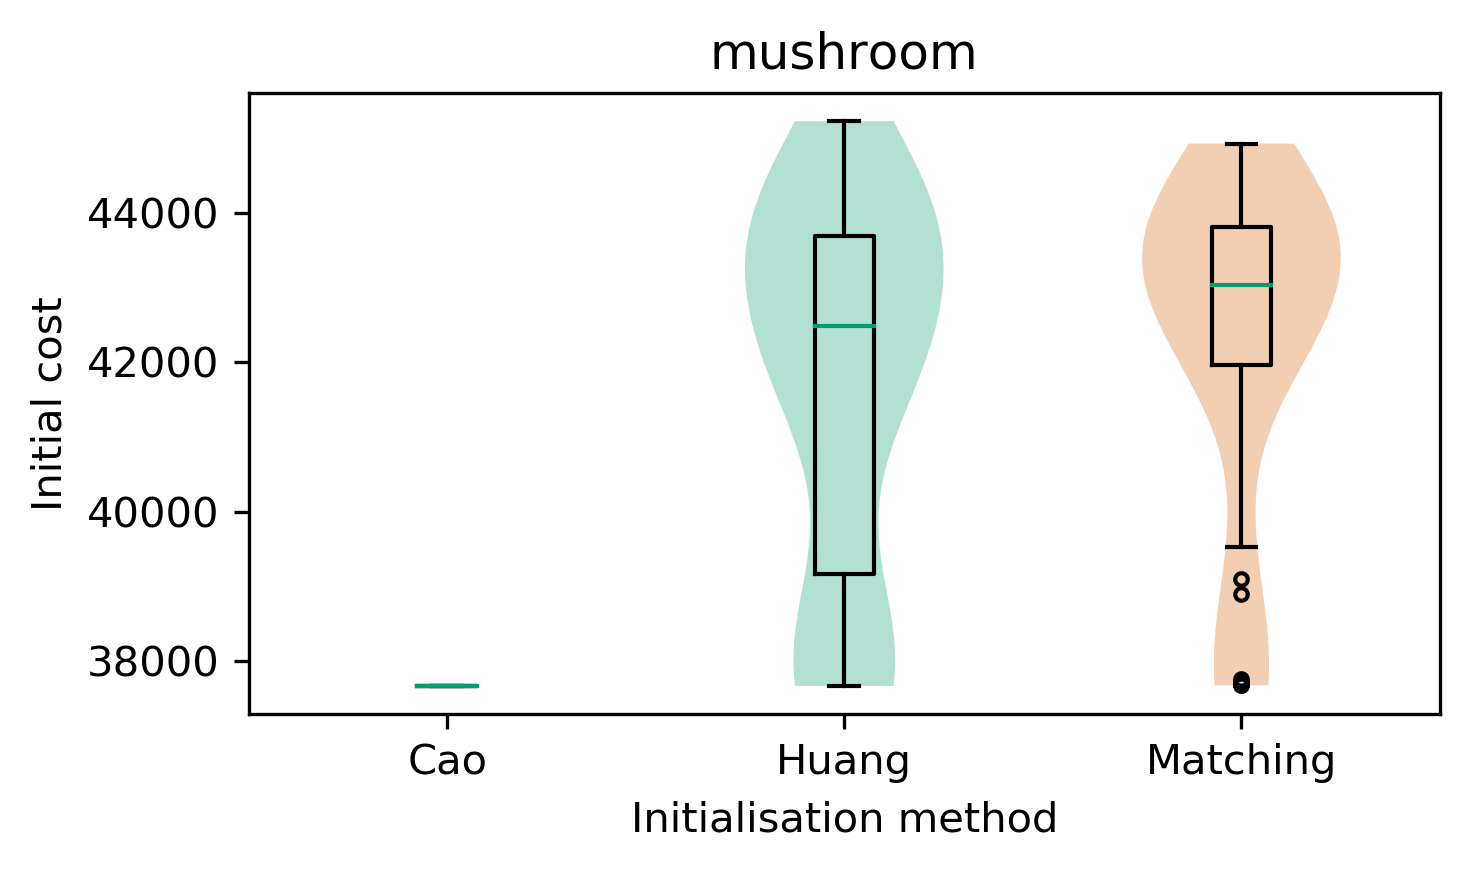

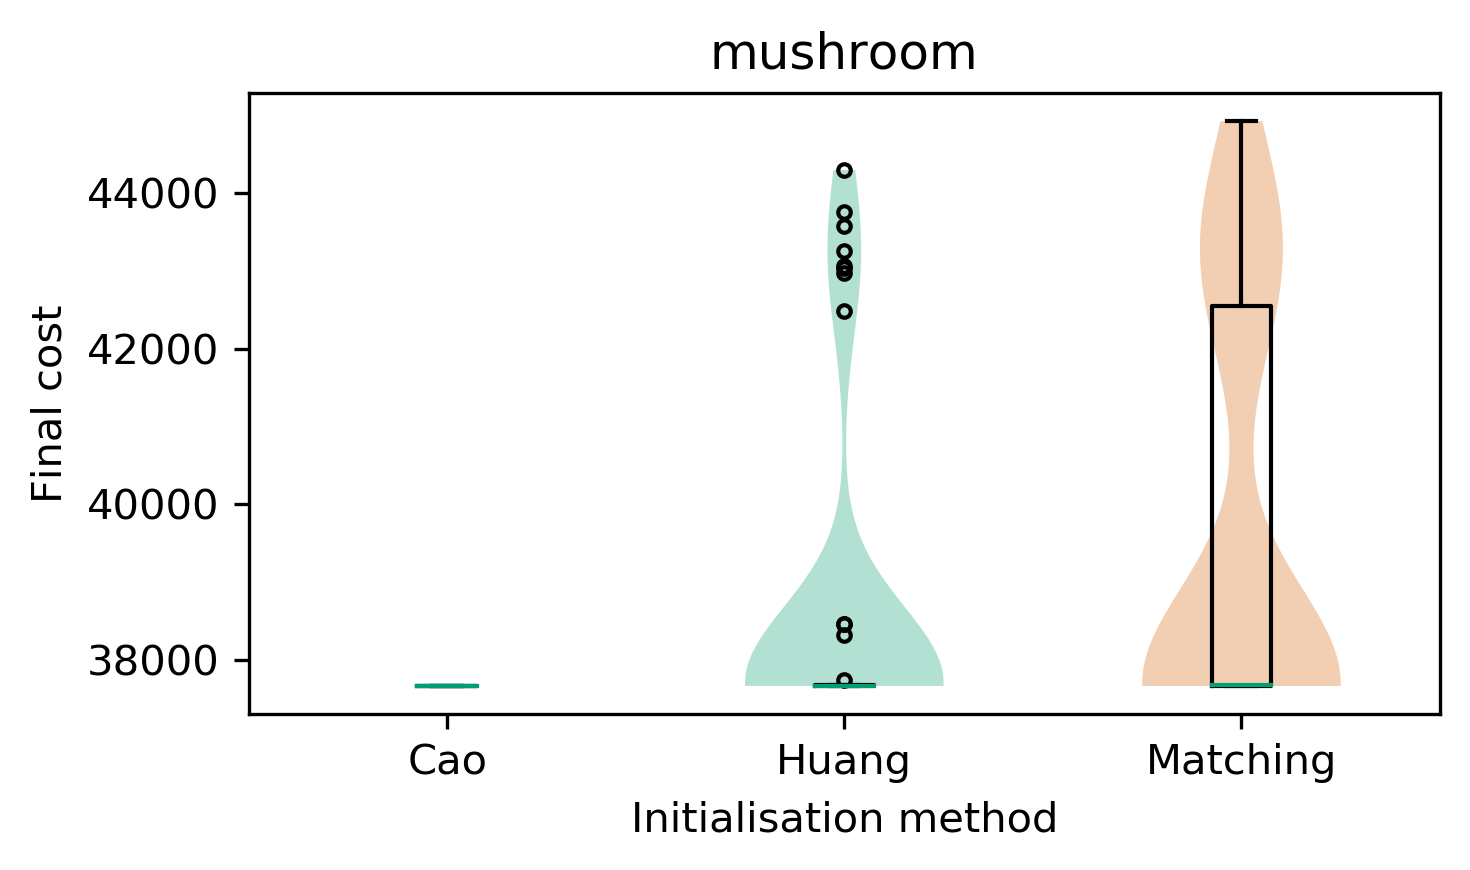

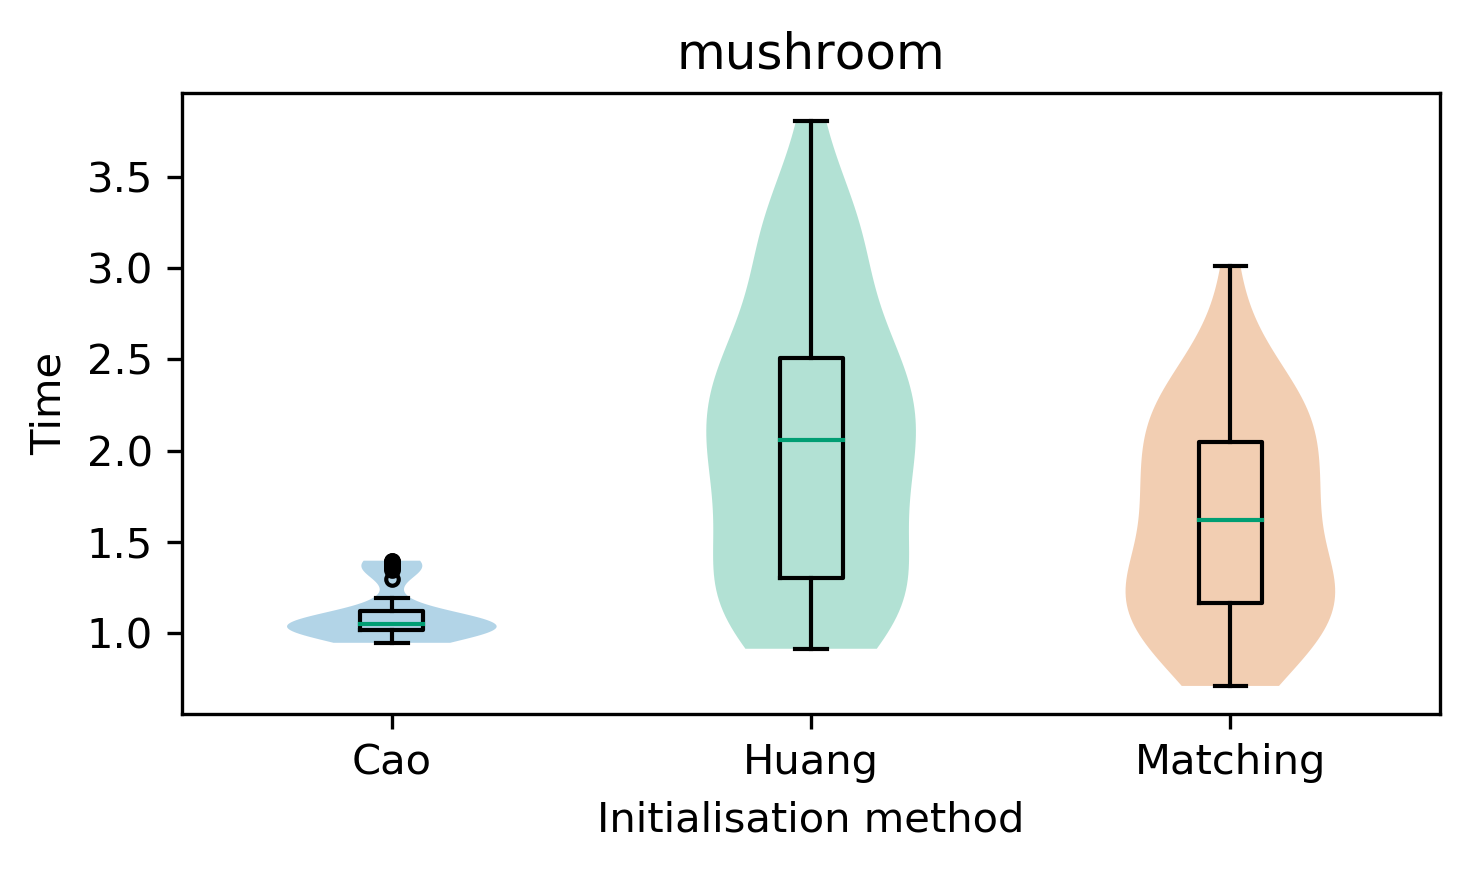

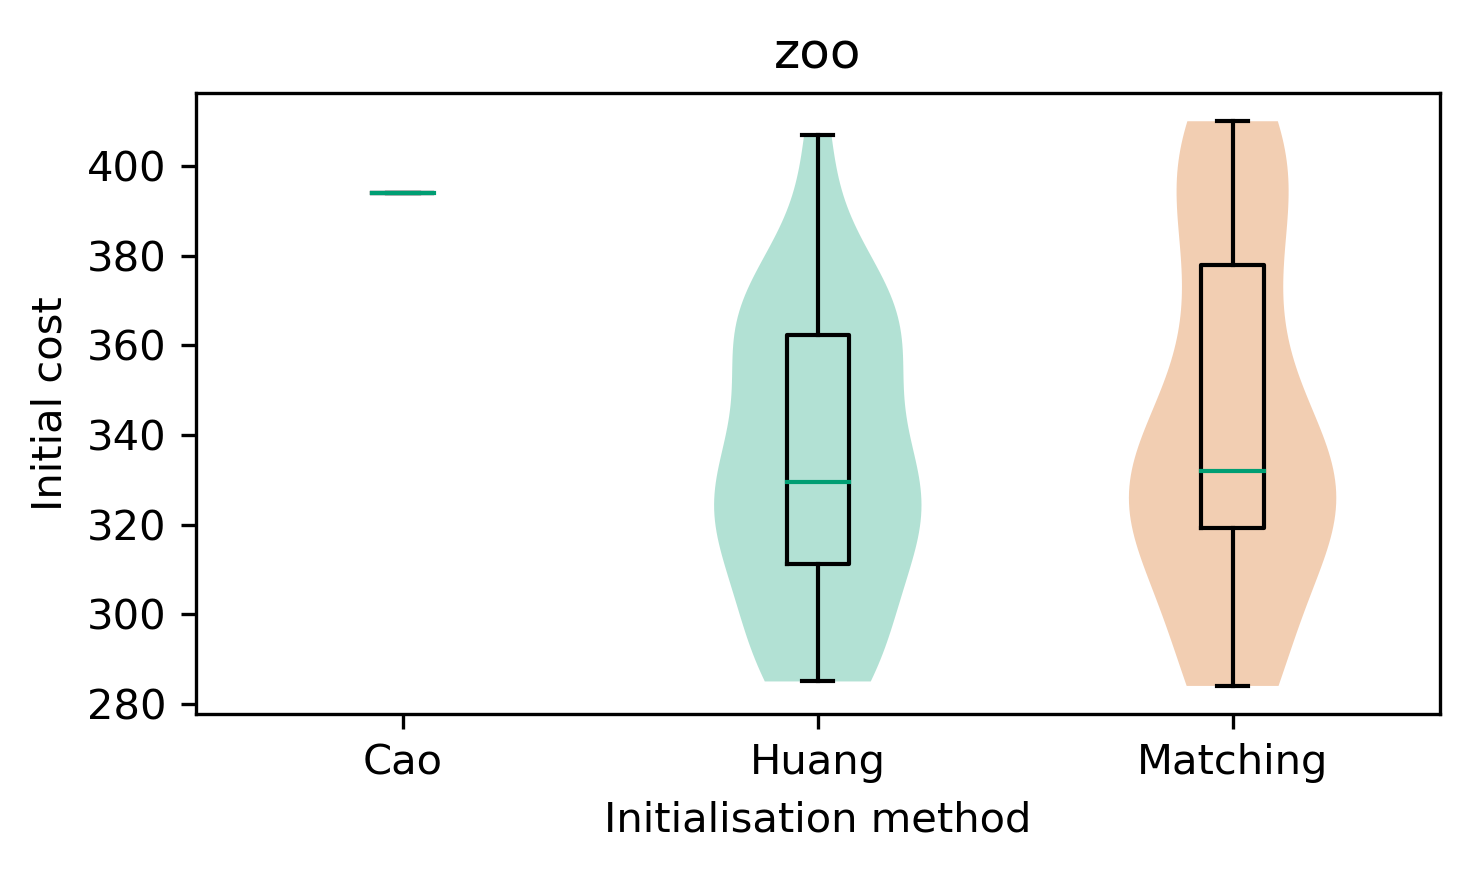

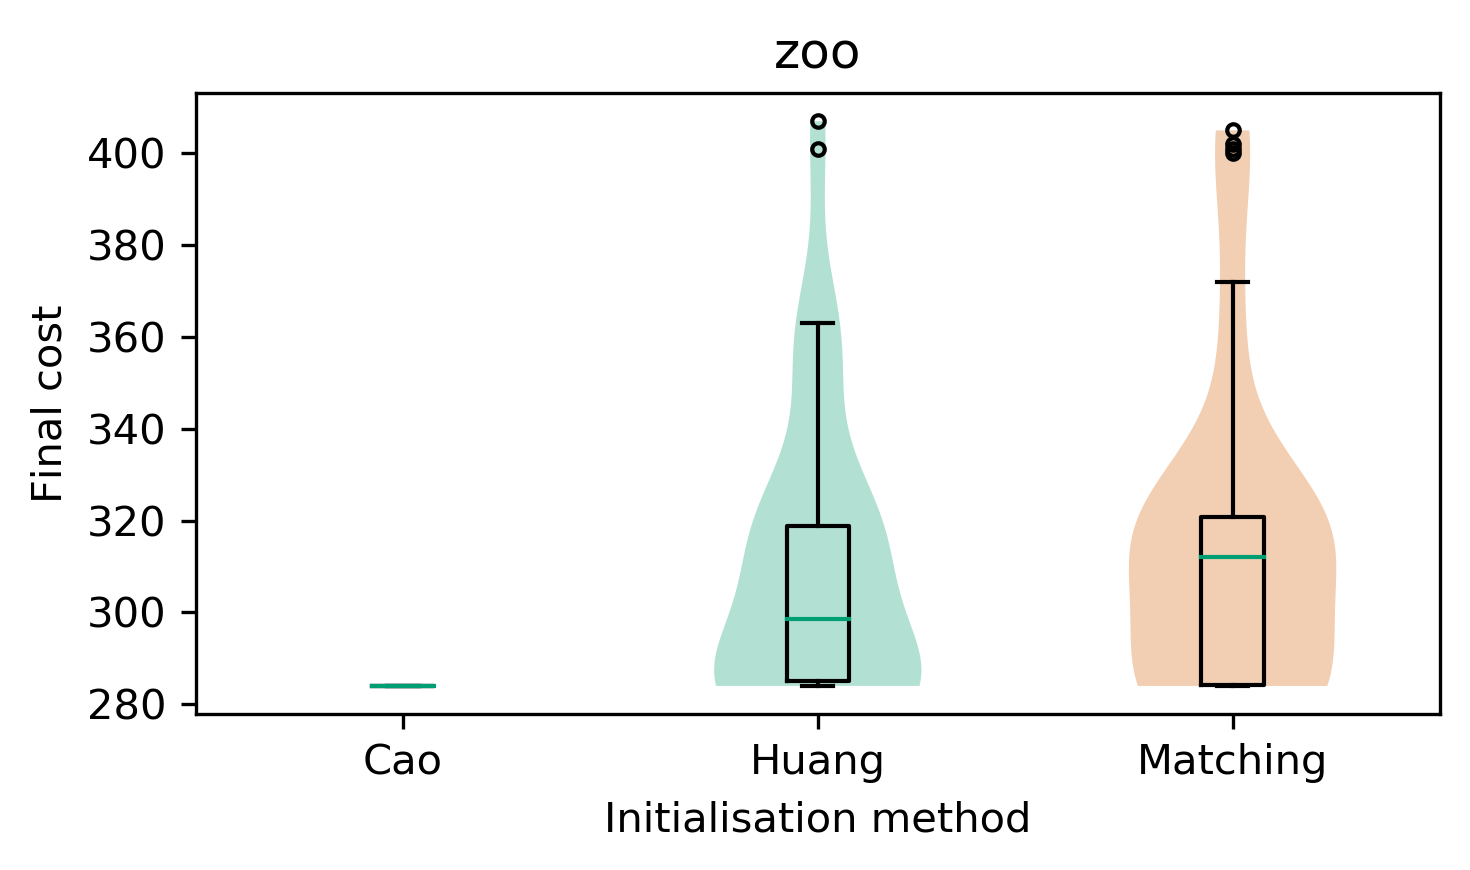

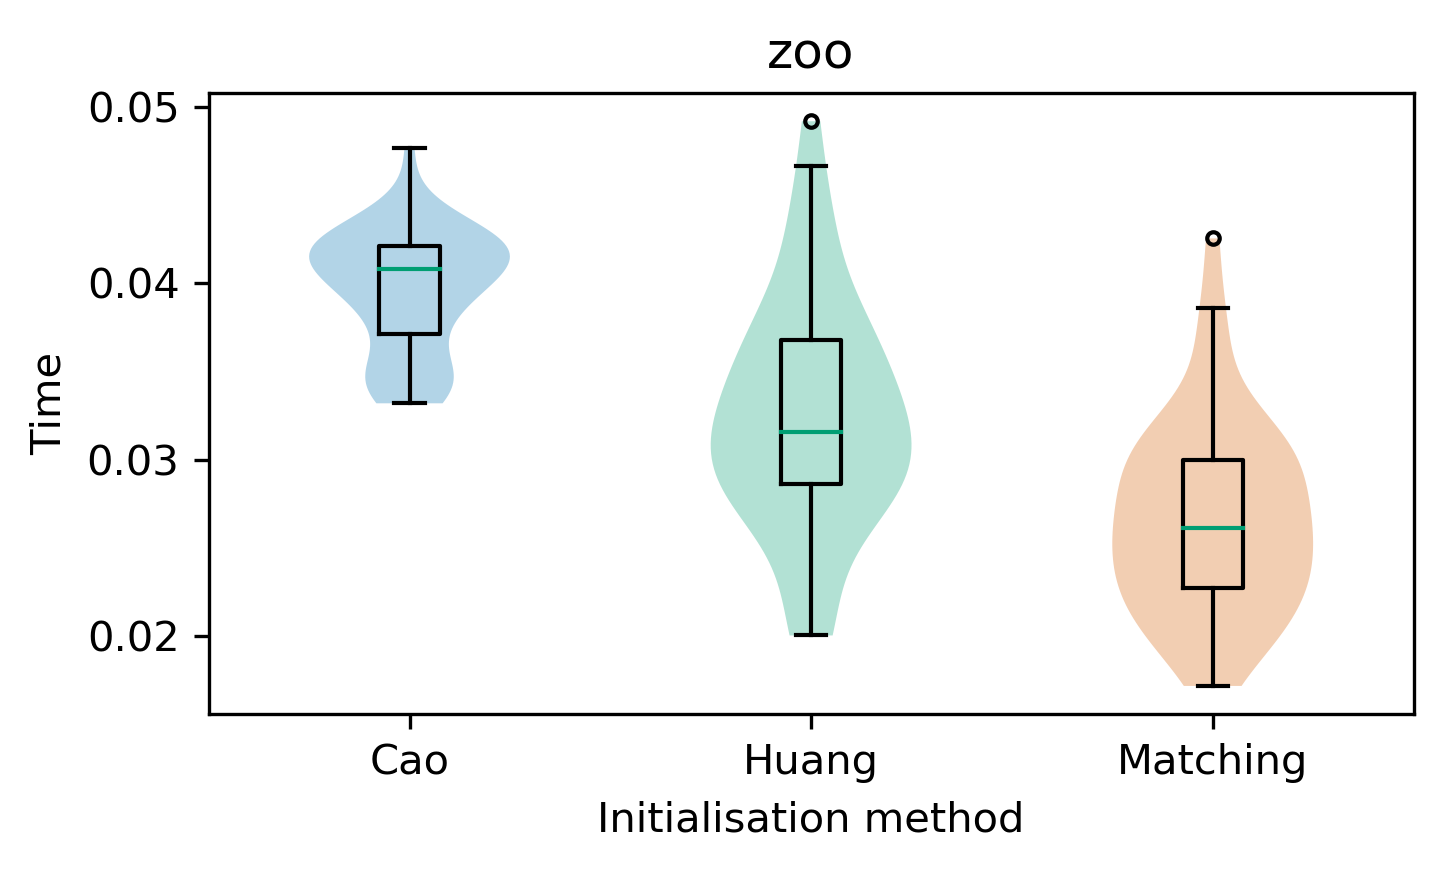

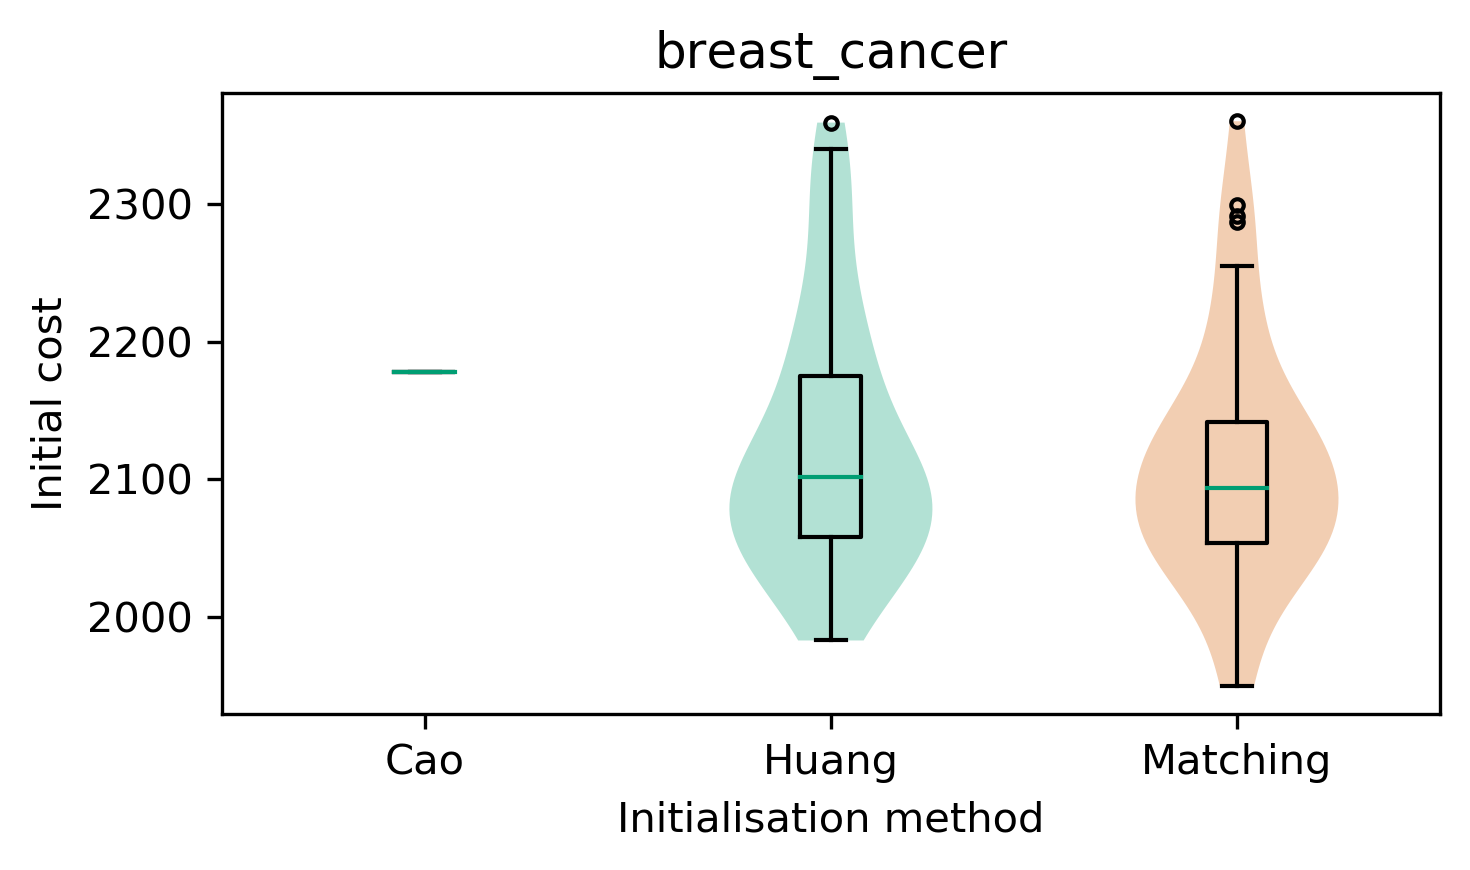

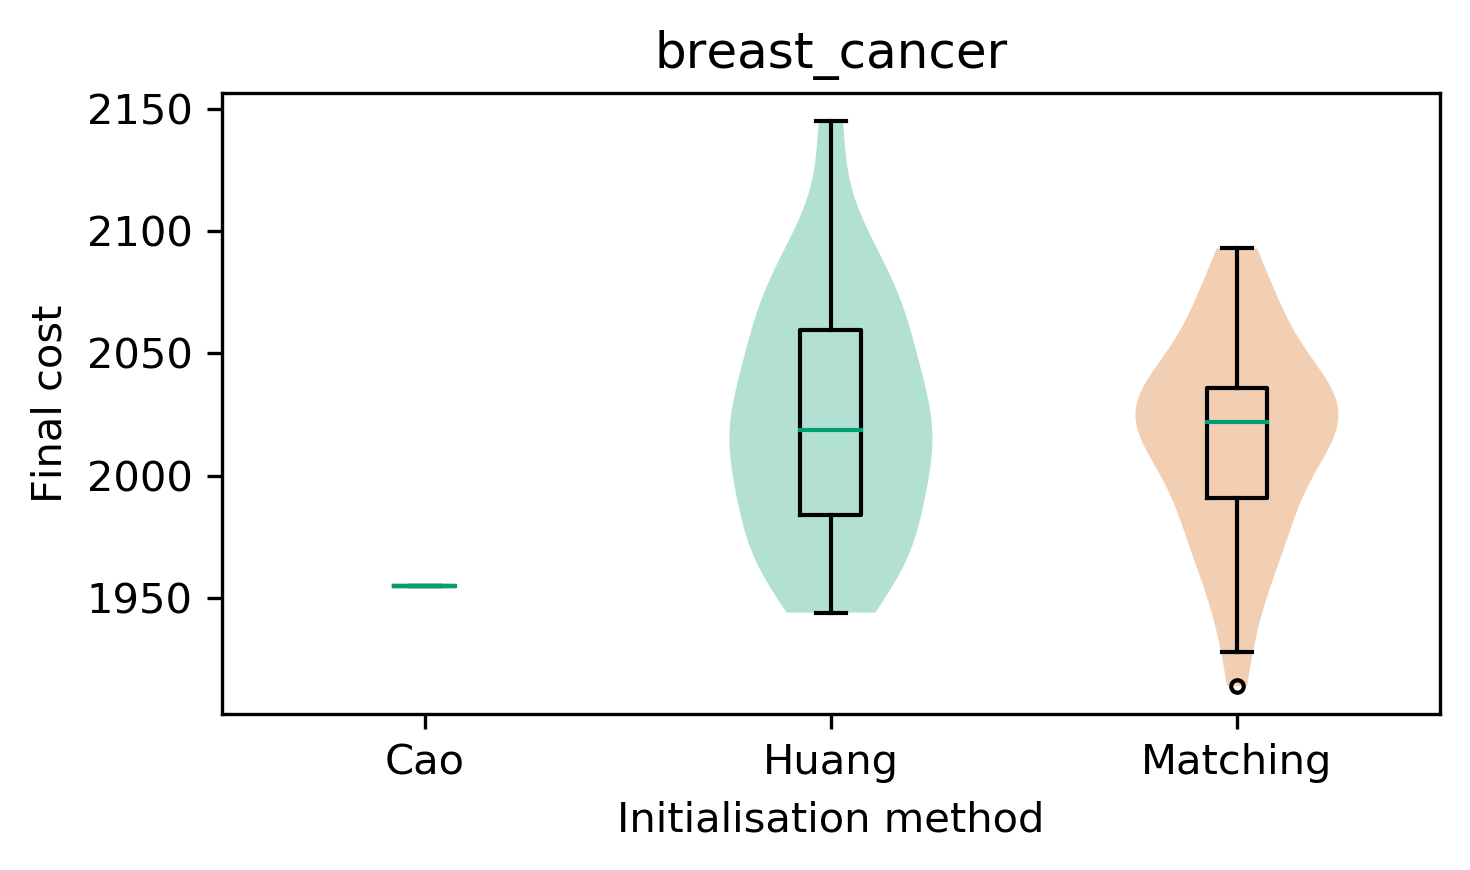

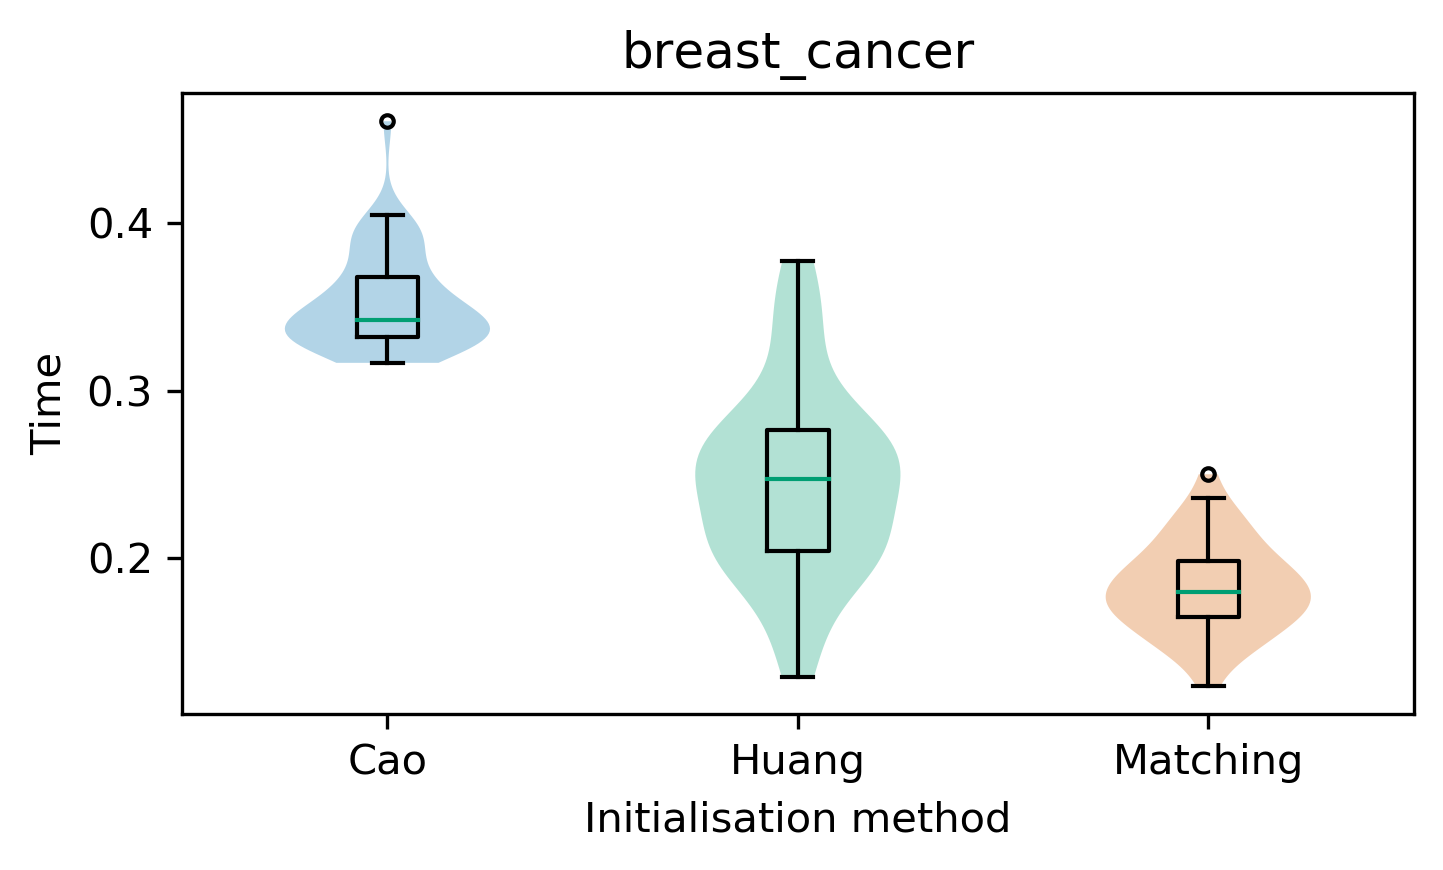

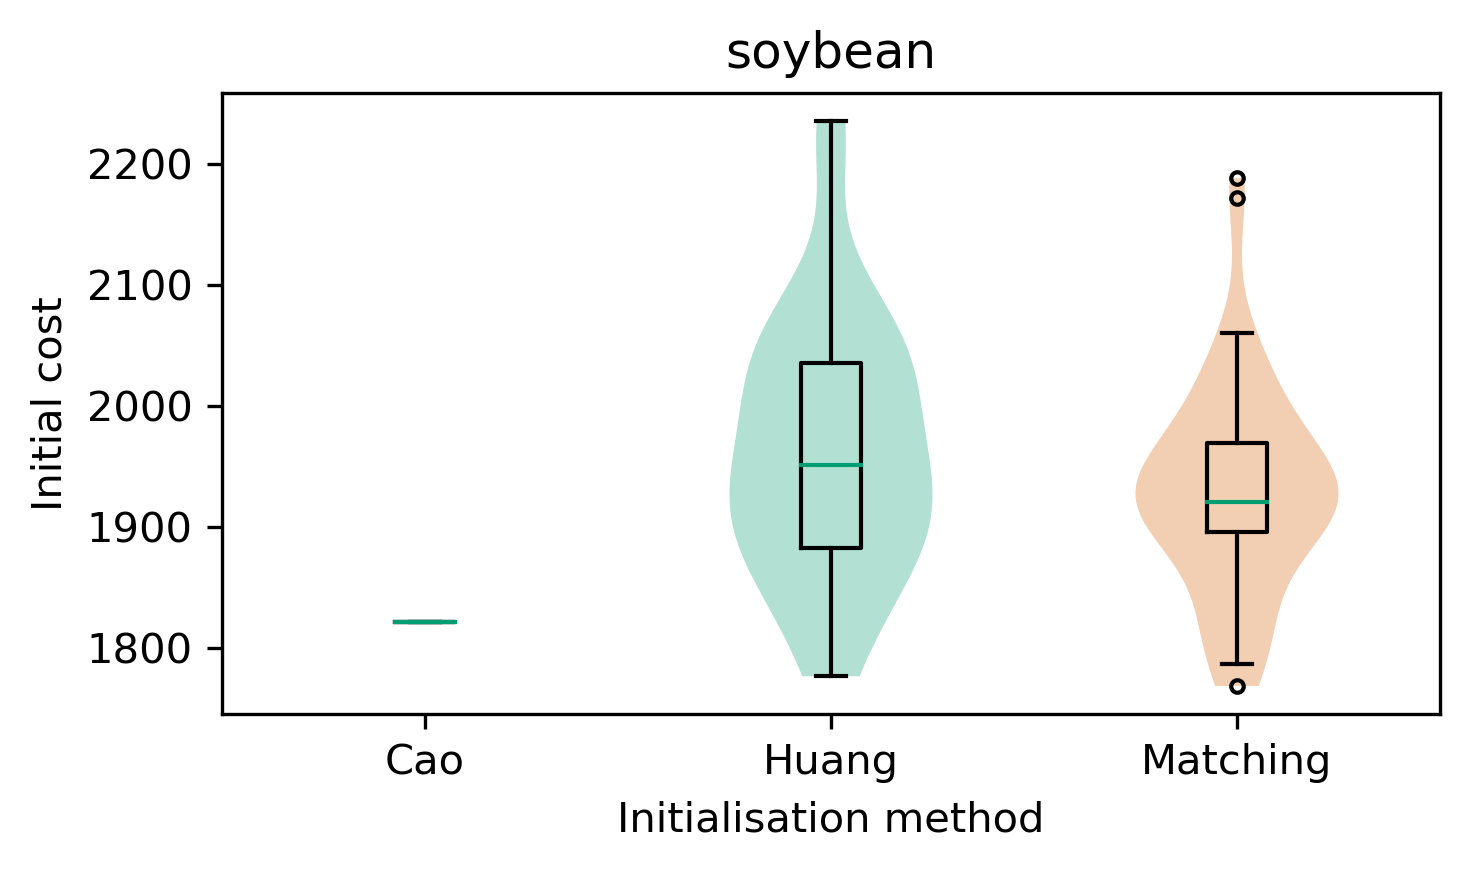

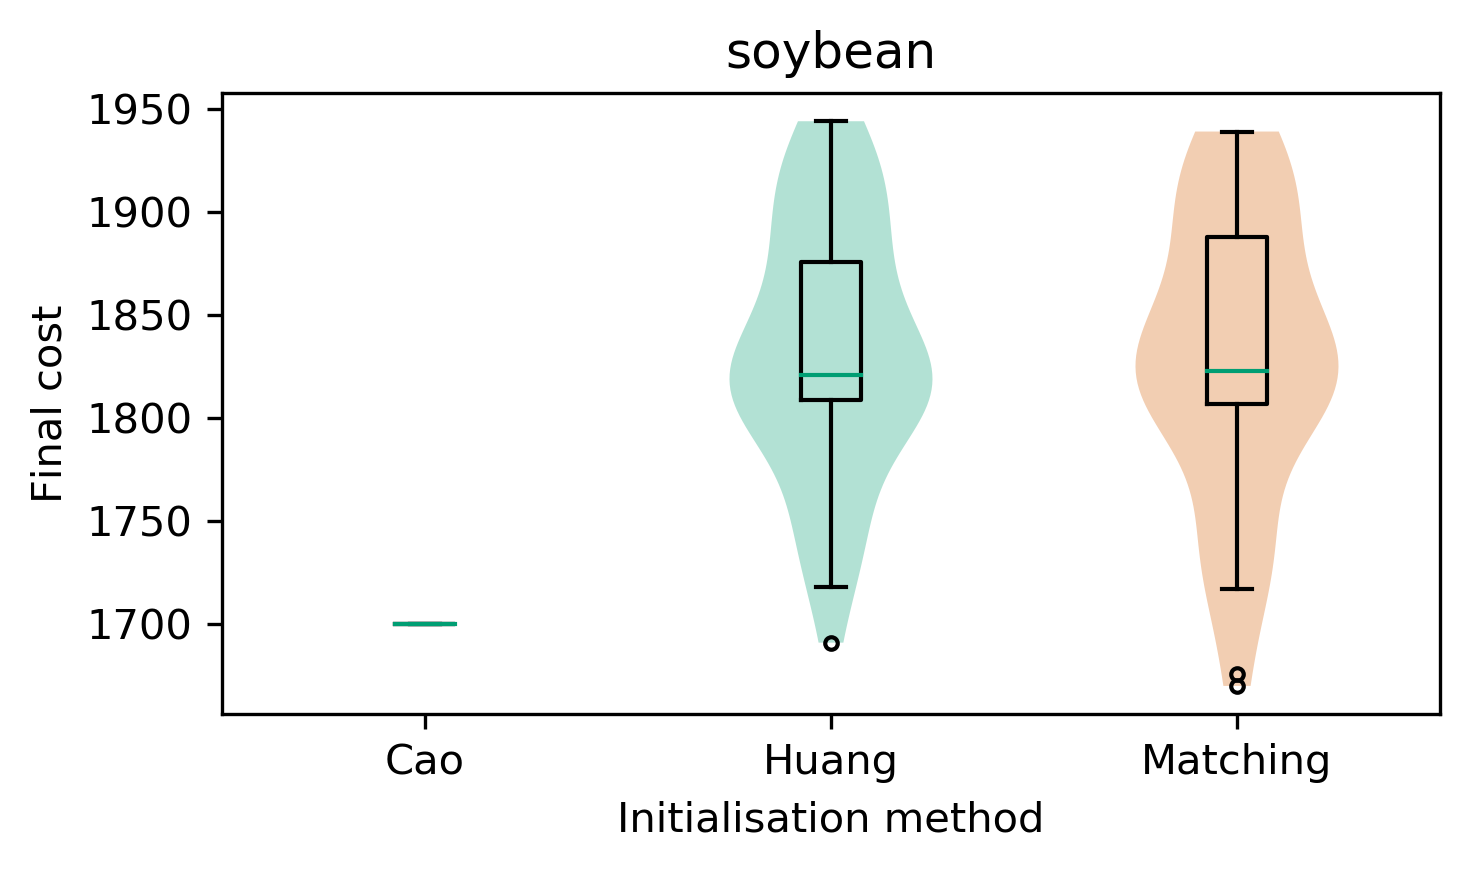

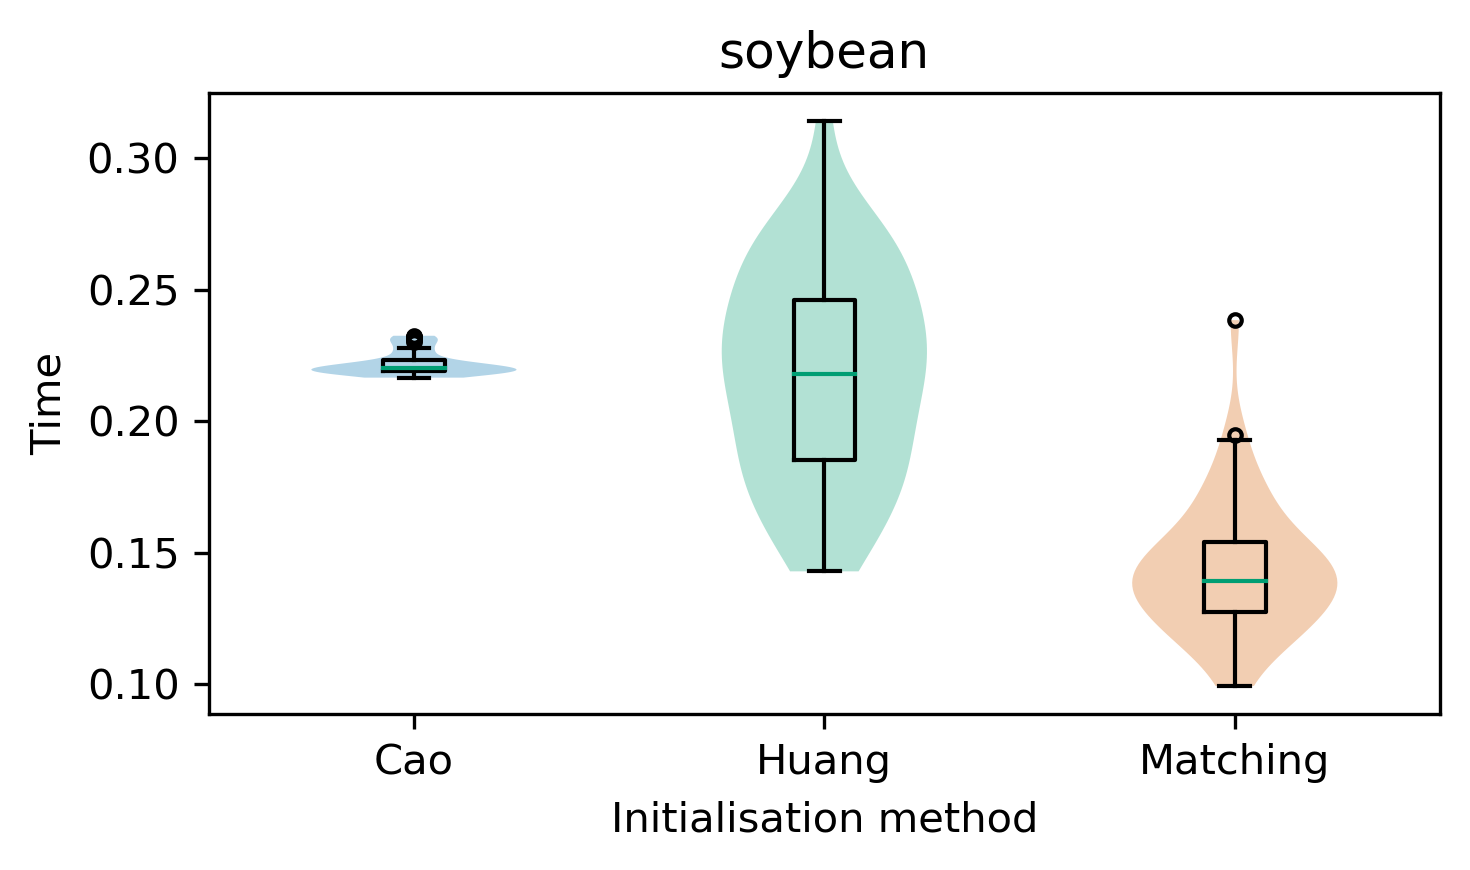

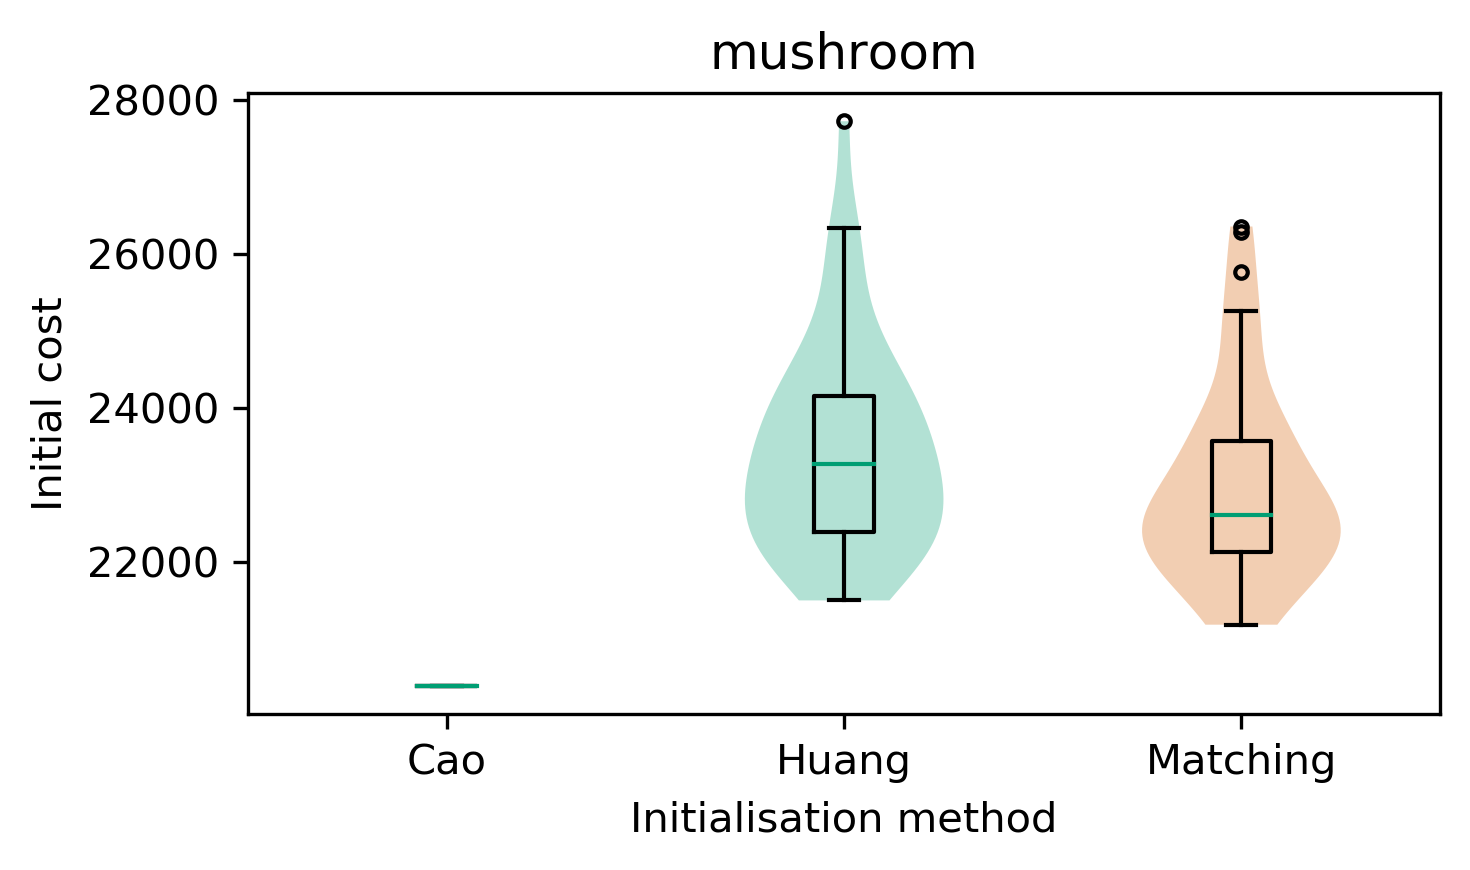

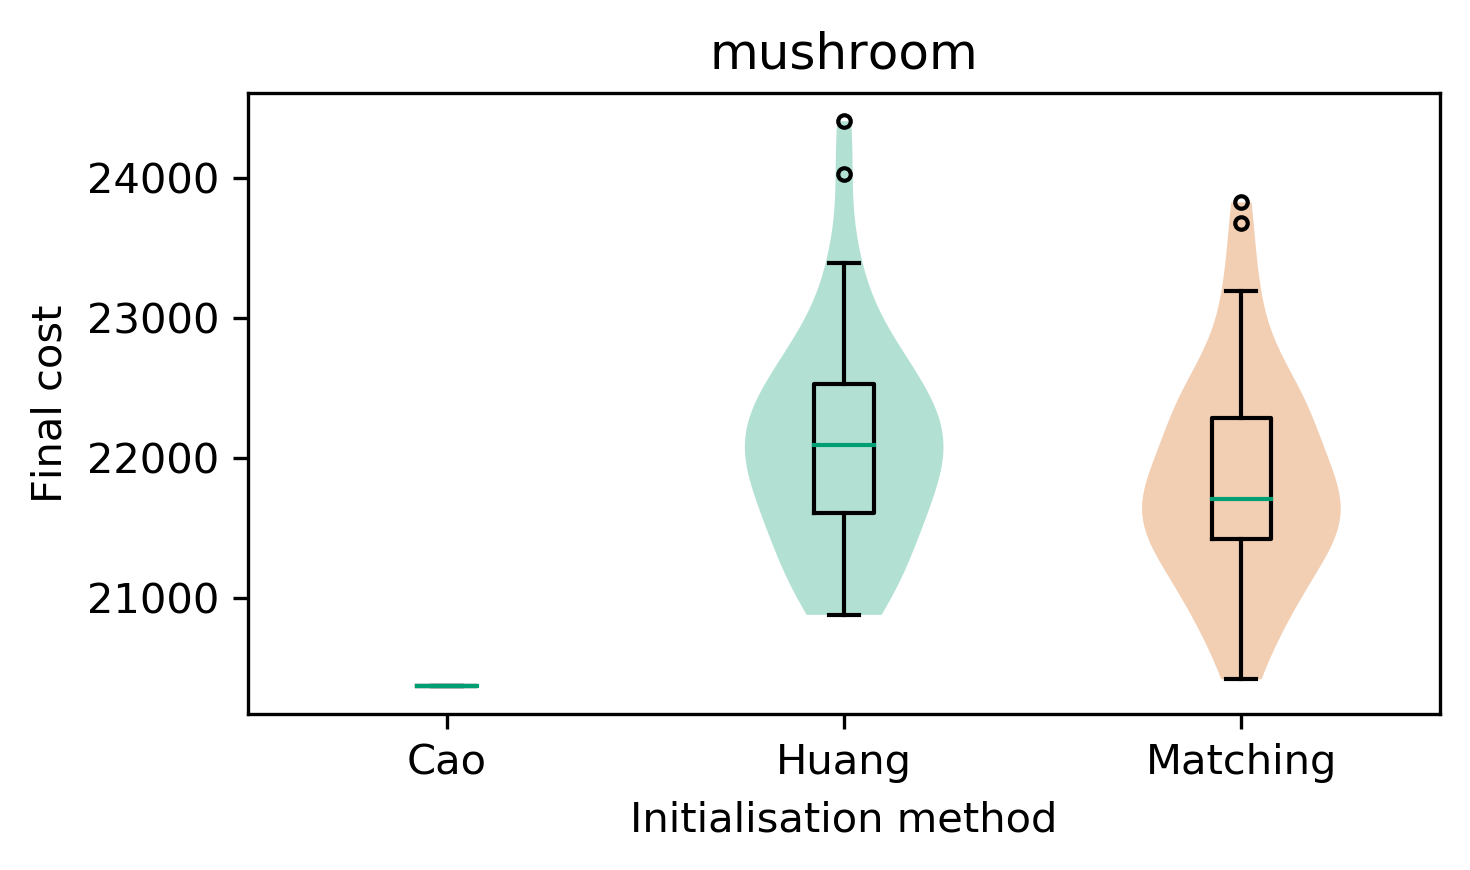

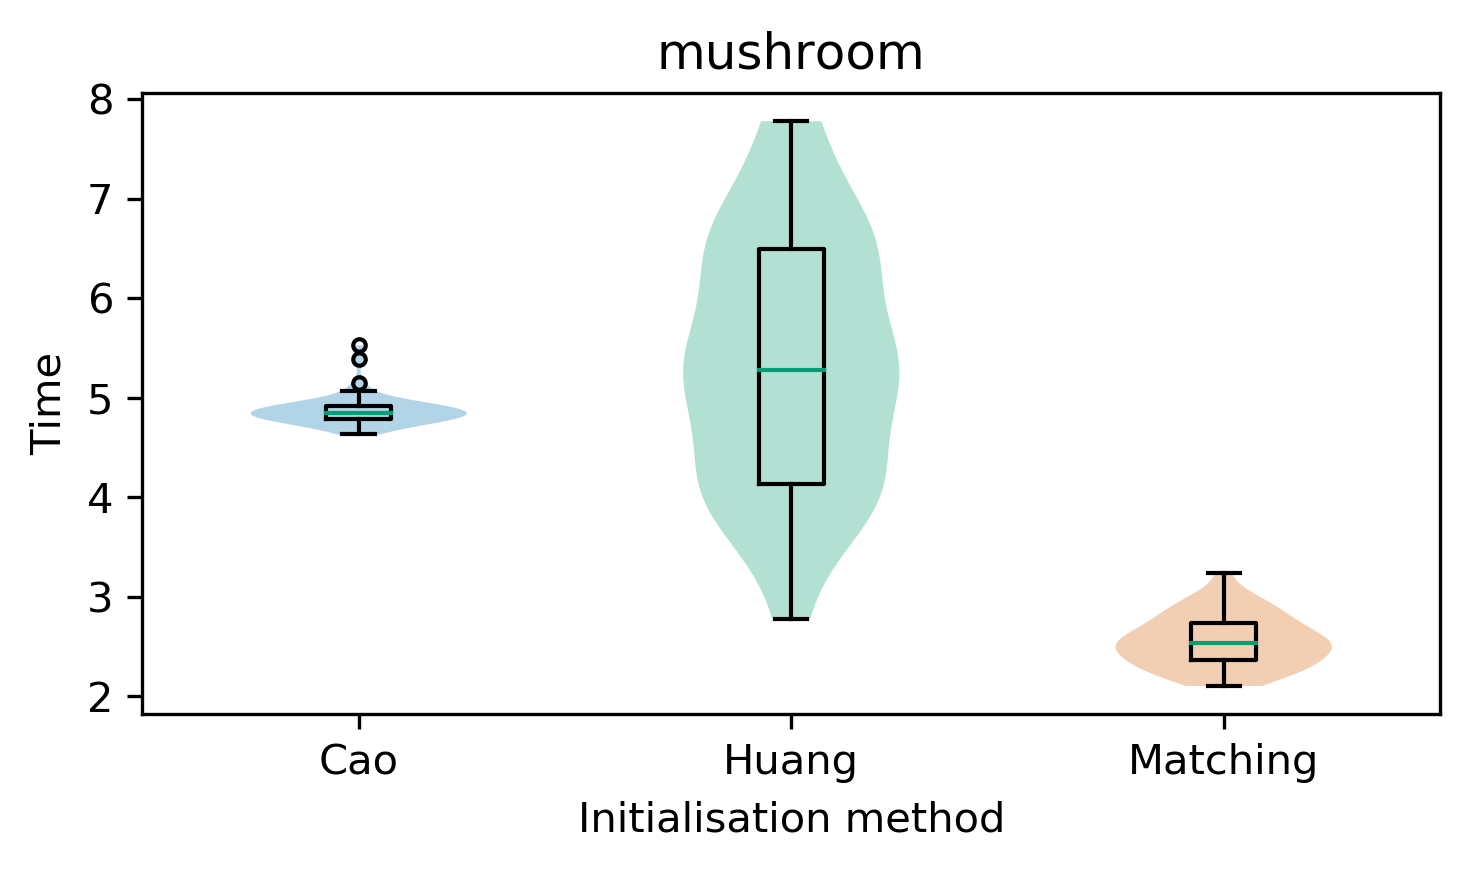

In [8]:
for root in ("elbow/", "nclasses/", "sqrt_nrows/"):
    for name in ("zoo", "breast_cancer", "soybean", "mushroom"):
        for column in (
            "initial_cost",
            "final_cost",
            "time",
        ):
            violin_plots(name, column, f"../data/{root}", destination=f"../img/{root}")


# Get result tables


In [4]:
def get_summary(name, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    means = results.groupby("initialisation")[
        [
            "initial_cost",
            "final_cost",
            "n_iterations",
            "time",
        ]
    ].mean()

    stds = results.groupby("initialisation")[
        [
            "initial_cost",
            "final_cost",
            "n_iterations",
            "time",
        ]
    ].std()

    summary = pd.DataFrame(columns=means.columns, index=means.index)
    for j, column in enumerate(means):
        for i, _ in enumerate(means[column]):
            summary.iloc[i, j] = f"{means.iloc[i, j]:.2f} ({stds.iloc[i, j]:.3f})"

    summary.columns = [
        "Initial cost",
        "Final cost",
        "No. iterations",
        "Time",
    ]
    summary.index = ["Cao", "Huang", "Matching"]

    if destination is not None:
        summary.to_latex(f"{destination}{name}_summary.tex")

    return summary


In [5]:
for root in ("elbow/", "nclasses/", "sqrt_nrows/"):
    for name in ("zoo", "breast_cancer", "soybean", "mushroom"):
        get_summary(name, f"../data/{root}", f"../tex/{root}")


FileNotFoundError: [Errno 2] No such file or directory: '../tex/elbow/zoo_summary.tex'